# Perform Analysis, Verification and Validation

In [105]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats, diagnostic
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rcParams['savefig.facecolor']='white'

csv_files = [
    "result/data/Aged DE Tuned.csv",
    "result/data/Aged HS Tuned.csv",
    "result/data/Aged PSO Tuned.csv",
    "result/data/Aged Byopt DE Tuned.csv",
    "result/data/Aged Byopt HS Tuned.csv",
    "result/data/Aged Byopt PSO Tuned.csv",
    "result/data/DE Tuned.csv",
    "result/data/HS Tuned.csv",
    "result/data/PSO Tuned.csv",
    "result/data/Byopt DE Tuned.csv",
    "result/data/Byopt HS Tuned.csv",
    "result/data/Byopt PSO Tuned.csv",
    "result/data/Voting.csv",
    "result/data/Naive.csv"
]


# Z-test and T-test
- Perform Z-test and T-test to test whether there is significantly difference between the population mean using the samples collected 

In [106]:
def ztest(csv, csv_):
    alternatives = ["two-sided", "larger", "smaller"]
    p_value = [[], [], []]
    res = [[], [], []]
    df_1 = pd.read_csv(csv)
    display("Current : ", csv)
    for csv_file in csv_:
        if csv_file != csv:  
            df_2 = pd.read_csv(csv_file)
            for idx, alt in enumerate(alternatives):
                d1 = weightstats.DescrStatsW(df_1["acc"])
                d2 = weightstats.DescrStatsW(df_2["acc"])

                t, p = weightstats.CompareMeans(d2, d1).ztest_ind(alternative=alt, usevar="unequal")
                p_value[idx].append(round(p, 5))
                if alt == "two-sided":
                    if p > 0.05:
                        res[0].append("equal")
                    else:
                        res[0].append("not equal")
                elif alt == "larger":
                    if p > 0.05:
                        res[1].append("greater")
                    else:
                        res[1].append("less")
                elif alt == "smaller":
                    if p > 0.05:
                        res[2].append("less")
                    else:
                        res[2].append("greater")
    df = pd.DataFrame(
        {
            "two-sided":p_value[0],
            "larger":p_value[1],
            "smaller":p_value[2],
            "two-sided res":res[0],
            "larger res":res[1],
            "smaller res":res[2]
        },
        index = [csv_file for csv_file in csv_ if csv_file != csv]
    )
    df.to_csv("result/z_test/" + csv.replace(".csv", "").replace("result/data/", "") + " z_test.csv")
    return df

In [107]:
def ttest(csv, csv_):
    alternatives = ["two-sided", "greater", "less"]
    p_value = [[], [], []]
    res = [[], [], []]
    df_1 = pd.read_csv(csv)
    display("Current : ", csv)
    for csv_file in csv_:
        if csv_file != csv:  
            df_2 = pd.read_csv(csv_file)
            for idx, alt in enumerate(alternatives):
                result = stats.ttest_ind(df_2["acc"].values, df_1["acc"].values, equal_var=False, alternative=alt)
                p_value[idx].append(round(result.pvalue, 5))
                p = result.pvalue
                if alt == "two-sided":
                    if p > 0.05:
                        res[0].append("equal")
                    else:
                        res[0].append("not equal")
                elif alt == "greater":
                    if p > 0.05:
                        res[1].append("greater")
                    else:
                        res[1].append("less")
                elif alt == "less":
                    if p > 0.05:
                        res[2].append("less")
                    else:
                        res[2].append("greater")
    df = pd.DataFrame(
        {
            "two-sided":p_value[0],
            "larger":p_value[1],
            "smaller":p_value[2],
            "two-sided res":res[0],
            "larger res":res[1],
            "smaller res":res[2]
        },
        index = [csv_file for csv_file in csv_ if csv_file != csv]
    )
    df.to_csv("result/t_test/" + csv.replace(".csv", "").replace("result/data/", "") + " t_test.csv")
    return df
    

In [108]:
for c in csv_files:
    # display(ztest(c, csv_files))
    ztest(c, csv_files)

'Current : '

'result/data/Aged DE Tuned.csv'

'Current : '

'result/data/Aged HS Tuned.csv'

'Current : '

'result/data/Aged PSO Tuned.csv'

'Current : '

'result/data/Aged Byopt DE Tuned.csv'

'Current : '

'result/data/Aged Byopt HS Tuned.csv'

'Current : '

'result/data/Aged Byopt PSO Tuned.csv'

'Current : '

'result/data/DE Tuned.csv'

'Current : '

'result/data/HS Tuned.csv'

'Current : '

'result/data/PSO Tuned.csv'

'Current : '

'result/data/Byopt DE Tuned.csv'

'Current : '

'result/data/Byopt HS Tuned.csv'

'Current : '

'result/data/Byopt PSO Tuned.csv'

'Current : '

'result/data/Voting.csv'

'Current : '

'result/data/Naive.csv'

In [109]:
for c in csv_files:
    # display(ttest(c, csv_files))
    ttest(c, csv_files)

'Current : '

'result/data/Aged DE Tuned.csv'

'Current : '

'result/data/Aged HS Tuned.csv'

'Current : '

'result/data/Aged PSO Tuned.csv'

'Current : '

'result/data/Aged Byopt DE Tuned.csv'

'Current : '

'result/data/Aged Byopt HS Tuned.csv'

'Current : '

'result/data/Aged Byopt PSO Tuned.csv'

'Current : '

'result/data/DE Tuned.csv'

'Current : '

'result/data/HS Tuned.csv'

'Current : '

'result/data/PSO Tuned.csv'

'Current : '

'result/data/Byopt DE Tuned.csv'

'Current : '

'result/data/Byopt HS Tuned.csv'

'Current : '

'result/data/Byopt PSO Tuned.csv'

'Current : '

'result/data/Voting.csv'

'Current : '

'result/data/Naive.csv'

# Compare the results of both tests

In [110]:
def compare(z_test_csv, t_test_csv):
    z_df = pd.read_csv(z_test_csv)
    t_df = pd.read_csv(t_test_csv)
    col  = ["two-sided res", "larger res", "smaller res"]
    for c in col:
        display(z_df[c].equals(t_df[c]))
    
for f in csv_files:
    compare(f.replace(".csv", " z_test.csv").replace("data", "z_test"), f.replace(".csv", " t_test.csv").replace("data", "t_test"))

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

# Visualization

### Visualize the boxplot

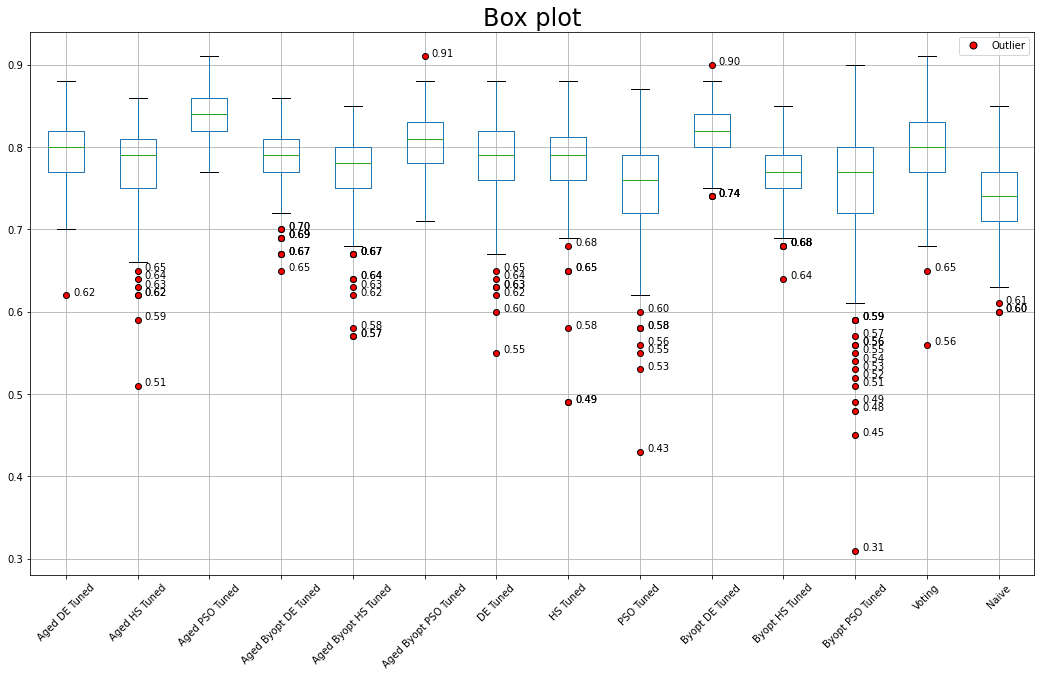

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D


df = pd.DataFrame()
for c in csv_files:
    df[c.replace("result/data/", "").replace(".csv", "")] = pd.read_csv(c)["acc"]

plt.figure(figsize=(18, 10))
point = Line2D([0], [0], label='Outlier', marker='o', markersize=7, 
        markeredgecolor='black', markerfacecolor='r', linestyle='')

ax, bp = pd.DataFrame.boxplot(df, return_type='both', flierprops=dict(markerfacecolor="red"))

outliers_y = [flier.get_ydata() for flier in bp["fliers"]]
outliers_x = [flier.get_xdata() for flier in bp["fliers"]]

for outlier_y, outlier_x in zip(outliers_y, outliers_x):
    for y, x in zip(outlier_y, outlier_x):
        ax.annotate(f'{y:.2f}', xy=(x, y), xytext=(x + 0.1, y))

handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([point])

plt.title("Box plot", fontsize=24)
plt.xticks(rotation=45)
plt.legend(handles=handles)
plt.savefig("result/image/boxplot.png")
plt.show()


### Visualize the statistical measure and the comparison

,best_accuracy,max_accuracy,min_accuracy,mean_accuracy,PI(best_fitness over naive),PI(mean over naive mean),PI(max over naive max),PRD(max vs best_fitness),skewness,kurtosis,std
Aged DE Tuned,0.94,0.88,0.62,0.797067,0.105882,0.079987,0.035294,0.0659,-0.563683,1.050164,0.037693
Aged HS Tuned,0.87,0.86,0.51,0.777733,0.023529,0.053792,0.011765,0.0116,-1.318221,3.678665,0.048656
Aged PSO Tuned,0.90,0.91,0.77,0.838833,0.058824,0.136579,0.070588,0.0110,-0.174784,-0.238688,0.025726
Aged Byopt DE Tuned,0.86,0.86,0.65,0.786300,0.011765,0.065399,0.011765,0.0000,-0.654741,1.080759,0.035282
Aged Byopt HS Tuned,0.86,0.85,0.57,0.770233,0.011765,0.043629,0.000000,0.0117,-1.385112,3.628307,0.044274
Aged Byopt PSO Tuned,0.88,0.91,0.71,0.806167,0.035294,0.092317,0.070588,0.0335,-0.183008,0.020675,0.034462
DE Tuned,0.88,0.88,0.55,0.783867,0.035294,0.062102,0.035294,0.0000,-1.246771,2.593043,0.048802
HS Tuned,0.89,0.88,0.49,0.782433,0.047059,0.060160,0.035294,0.0113,-1.900475,9.056414,0.047854
PSO Tuned,0.89,0.87,0.43,0.753633,0.047059,0.021137,0.023529,0.0227,-1.210384,3.374937,0.059881
Byopt DE Tuned,0.90,0.90,0.74,0.816133,0.058824,0.105822,0.058823,0.0000,-0.197353,-0.005680,0.027778


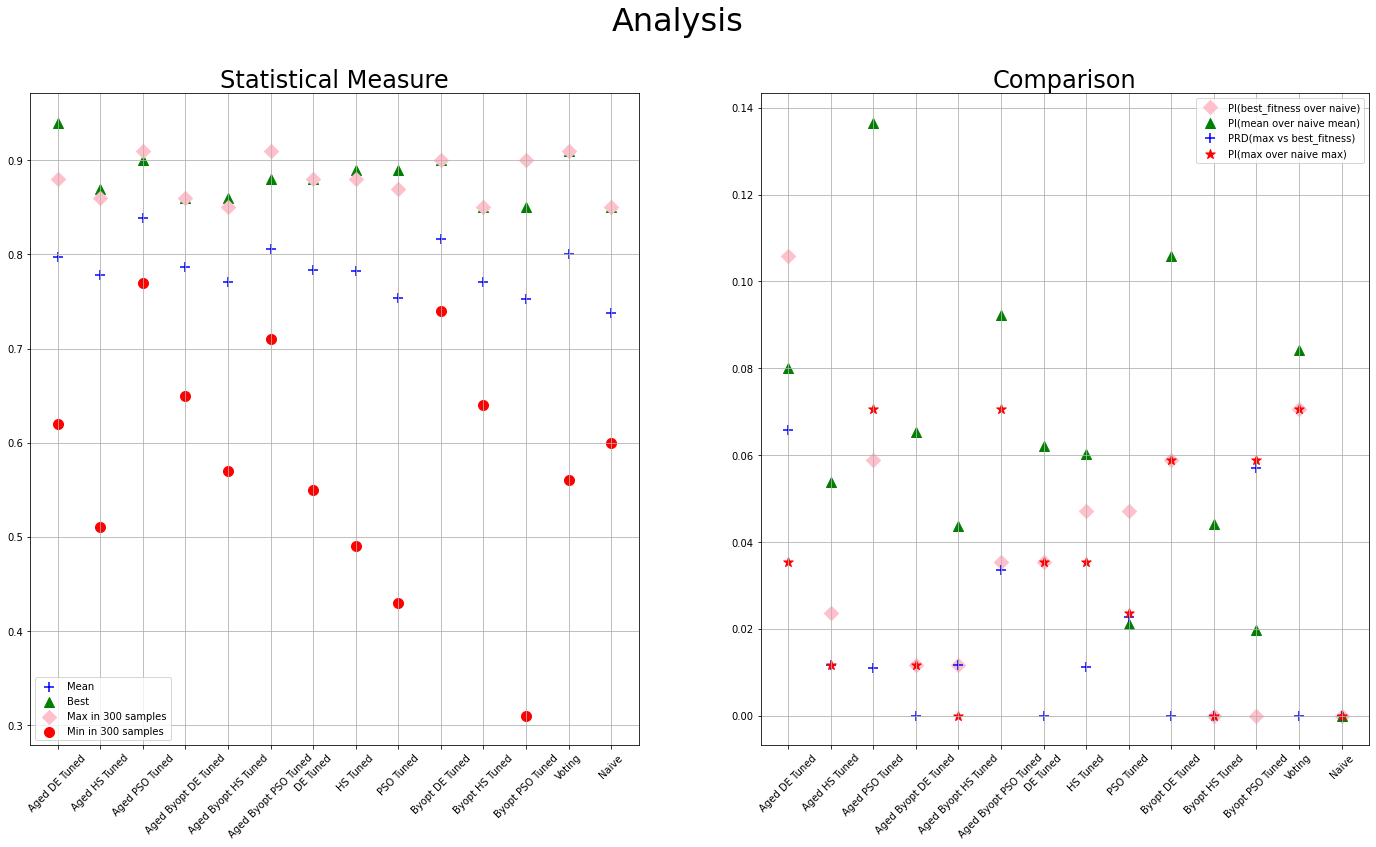

In [112]:
plt.figure(figsize=(24, 12))

x_axis = [x for x in range(1, len(df.mean()) + 1)]
best_fitness = np.array([
    0.94, 0.87, 
    0.90, 
    0.86, 
    0.86, 
    0.88, 0.88, 0.89, 
    0.89, 
    0.90, 0.85, 
    0.85,
    df["Voting"].max(),
    0.85])


analysis = pd.DataFrame(
    {
        "best_accuracy":best_fitness,
        "max_accuracy":df.max().values,
        "min_accuracy":df.min().values,
        "mean_accuracy":df.mean().values,
        "PI(best_fitness over naive)":(best_fitness - best_fitness[-1]) / best_fitness[-1],
        "PI(mean over naive mean)":(df.mean().values - df.mean()["Naive"]) / df.mean()["Naive"],
        "PI(max over naive max)":(df.max().values - df.max()["Naive"]) / df.max()["Naive"],
        "PRD(max vs best_fitness)":np.round(np.abs(df.max().values - best_fitness) / ((df.max().values + best_fitness) / 2), 4),
        "skewness":df.skew().values,
        "kurtosis":df.kurtosis().values,
        "std":df.std().values

    },
    index=df.columns
)
display(analysis)

plt.subplot(1, 2, 1)
plt.scatter(x_axis, analysis["mean_accuracy"], marker="+", c="blue", s=100, label="Mean")
plt.scatter(x_axis, analysis["best_accuracy"], 
            marker="^", c="green", s=100, label="Best")
plt.scatter(x_axis, analysis["max_accuracy"], 
            marker="D", c="pink", s=100, label="Max in 300 samples")
plt.scatter(x_axis, analysis["min_accuracy"], 
            marker="o", c="red", s=100, label="Min in 300 samples")
plt.xticks(x_axis, df.columns, rotation=45)
plt.legend()
plt.grid()
plt.title("Statistical Measure", fontsize=24)

plt.subplot(1, 2, 2)
plt.scatter(x_axis, analysis["PI(best_fitness over naive)"], marker="D", c="pink", s=100, label="PI(best_fitness over naive)")
plt.scatter(x_axis, analysis["PI(mean over naive mean)"], 
            marker="^", c="green", s=100, label="PI(mean over naive mean)")
plt.scatter(x_axis, analysis["PRD(max vs best_fitness)"], 
            marker="+", c="blue", s=100, label="PRD(max vs best_fitness)")
plt.scatter(x_axis, analysis["PI(max over naive max)"], 
            marker="*", c="red", s=100, label="PI(max over naive max)")

plt.xticks(x_axis, df.columns, rotation=45)
plt.legend()
plt.grid()
plt.title("Comparison", fontsize=24)
plt.suptitle("Analysis", fontsize=32)
plt.savefig("result/image/analysis.png")
plt.show()

analysis.to_csv("result/analysis.csv")

### Probability of population mean within $k$ sample std of sample mean

- Treat sample mean as random variable 
- Apply Chebyshev's Inequality
  - Given the random variables with mean $\mu$ and variance $\sigma^2$, then 
  - $P(|X - \mu|<k\sigma) \geq 1-\frac{1}{k^2}$
- Now, suppose the population mean is $\mu$ and variance is $\sigma^2$ then the mean of the sample mean is $\mu$ while the variance is $\frac{\sigma^2}{n}$ thus
- $P(|\hat{X} - \mu|<k\frac{\sigma}{\sqrt{n}}) \geq 1-\frac{1}{k^2}$
- $k=1, \sqrt{2}, 1.5, 2, 2\sqrt{2}, 3, 4, 5, 6, 7, 8, 9, 10$


In [113]:
k_sqrt_100 = np.array([1, np.sqrt(2), 1.5, 2, 2 * np.sqrt(2), 3, 4, 5, 6, 7, 8, 9, 10])
k = k_sqrt_100 * 10
p = 1 - (1 / k ** 2)
for _, p_,  in zip(k_sqrt_100, p):
    print(f"Probability of population mean within {_:.4f} sample std of sample mean : ", p_)

Probability of population mean within 1.0000 sample std of sample mean :  0.99
Probability of population mean within 1.4142 sample std of sample mean :  0.995
Probability of population mean within 1.5000 sample std of sample mean :  0.9955555555555555
Probability of population mean within 2.0000 sample std of sample mean :  0.9975
Probability of population mean within 2.8284 sample std of sample mean :  0.99875
Probability of population mean within 3.0000 sample std of sample mean :  0.9988888888888889
Probability of population mean within 4.0000 sample std of sample mean :  0.999375
Probability of population mean within 5.0000 sample std of sample mean :  0.9996
Probability of population mean within 6.0000 sample std of sample mean :  0.9997222222222222
Probability of population mean within 7.0000 sample std of sample mean :  0.9997959183673469
Probability of population mean within 8.0000 sample std of sample mean :  0.99984375
Probability of population mean within 9.0000 sample std o

### Visualize P-Q plot, Q-Q Plot, P-P Plot and KDE plot

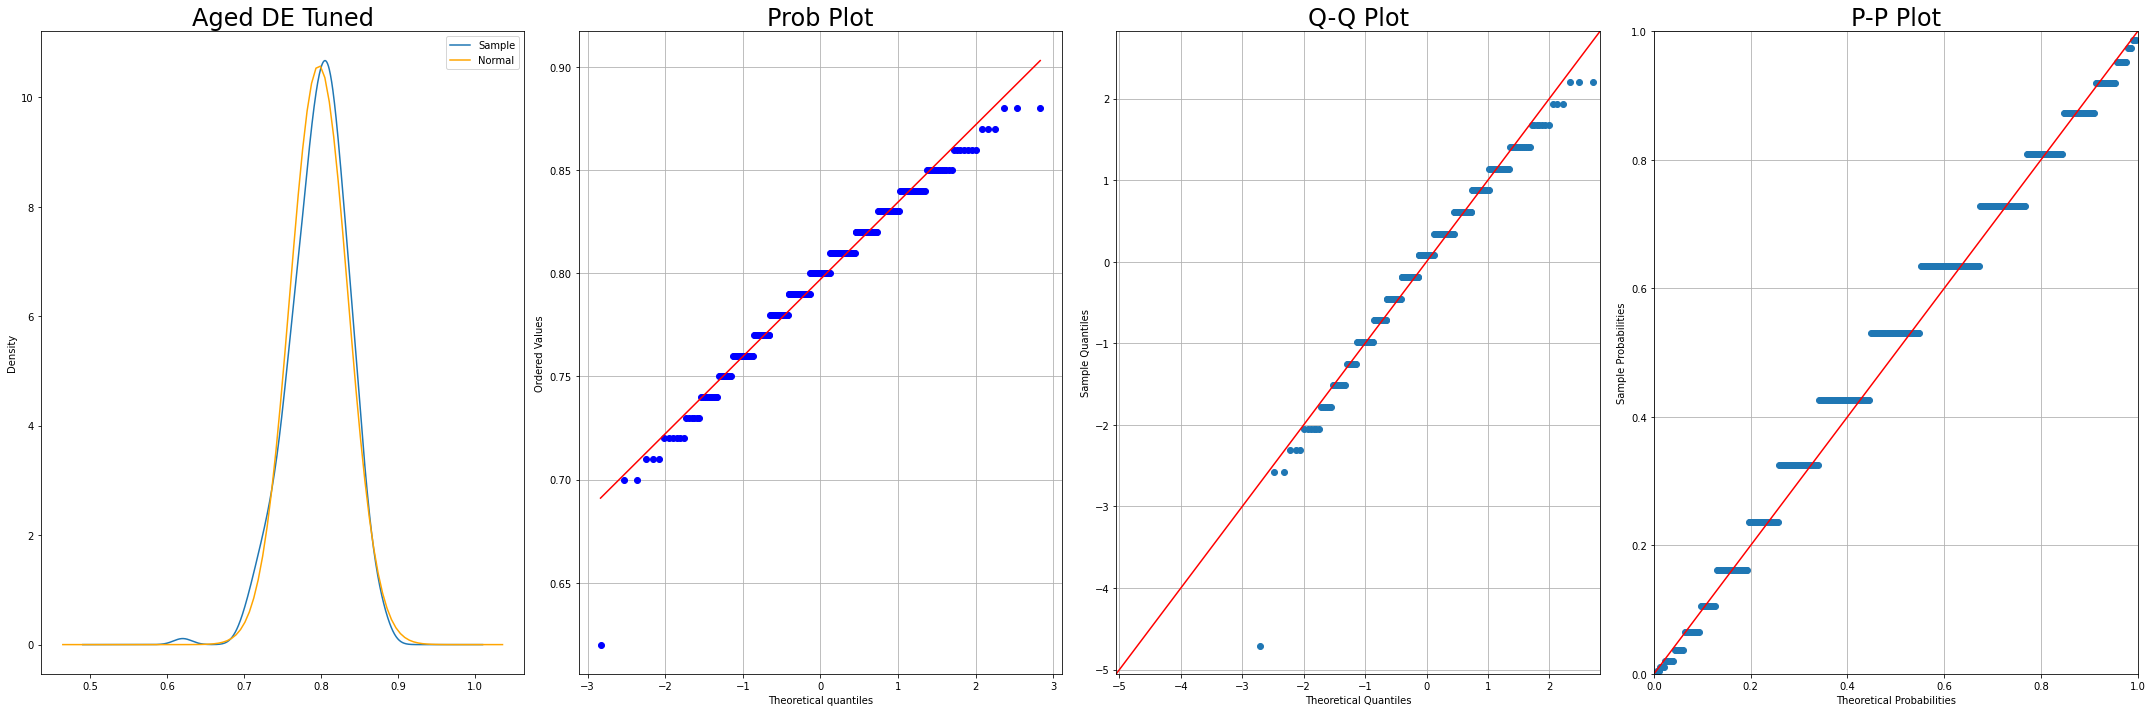

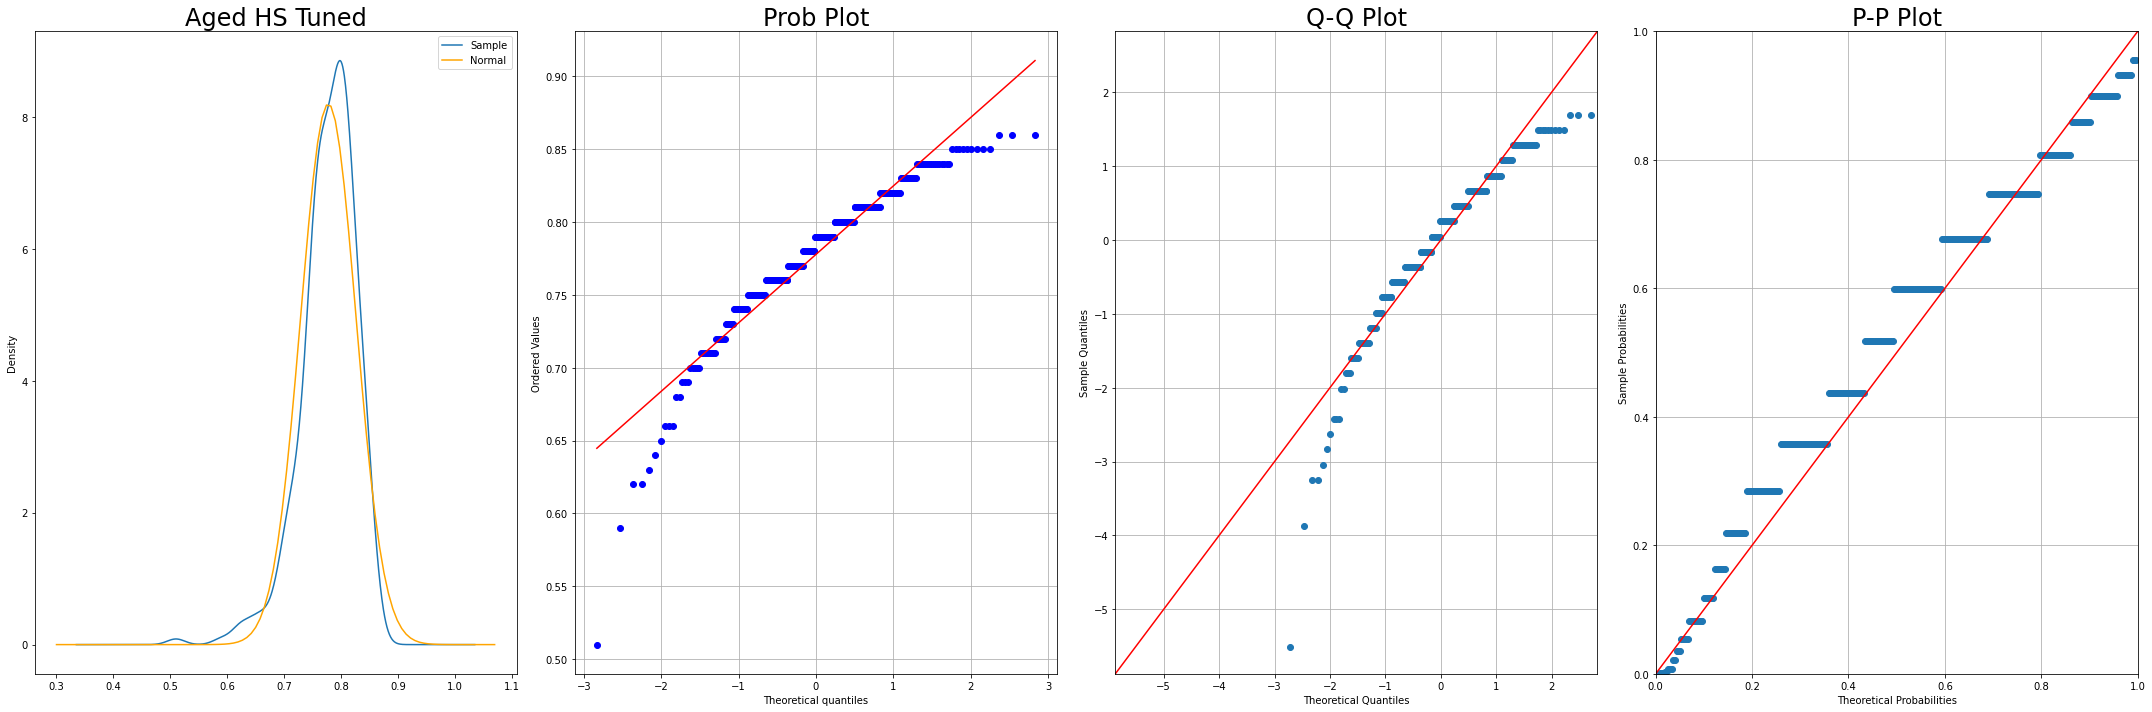

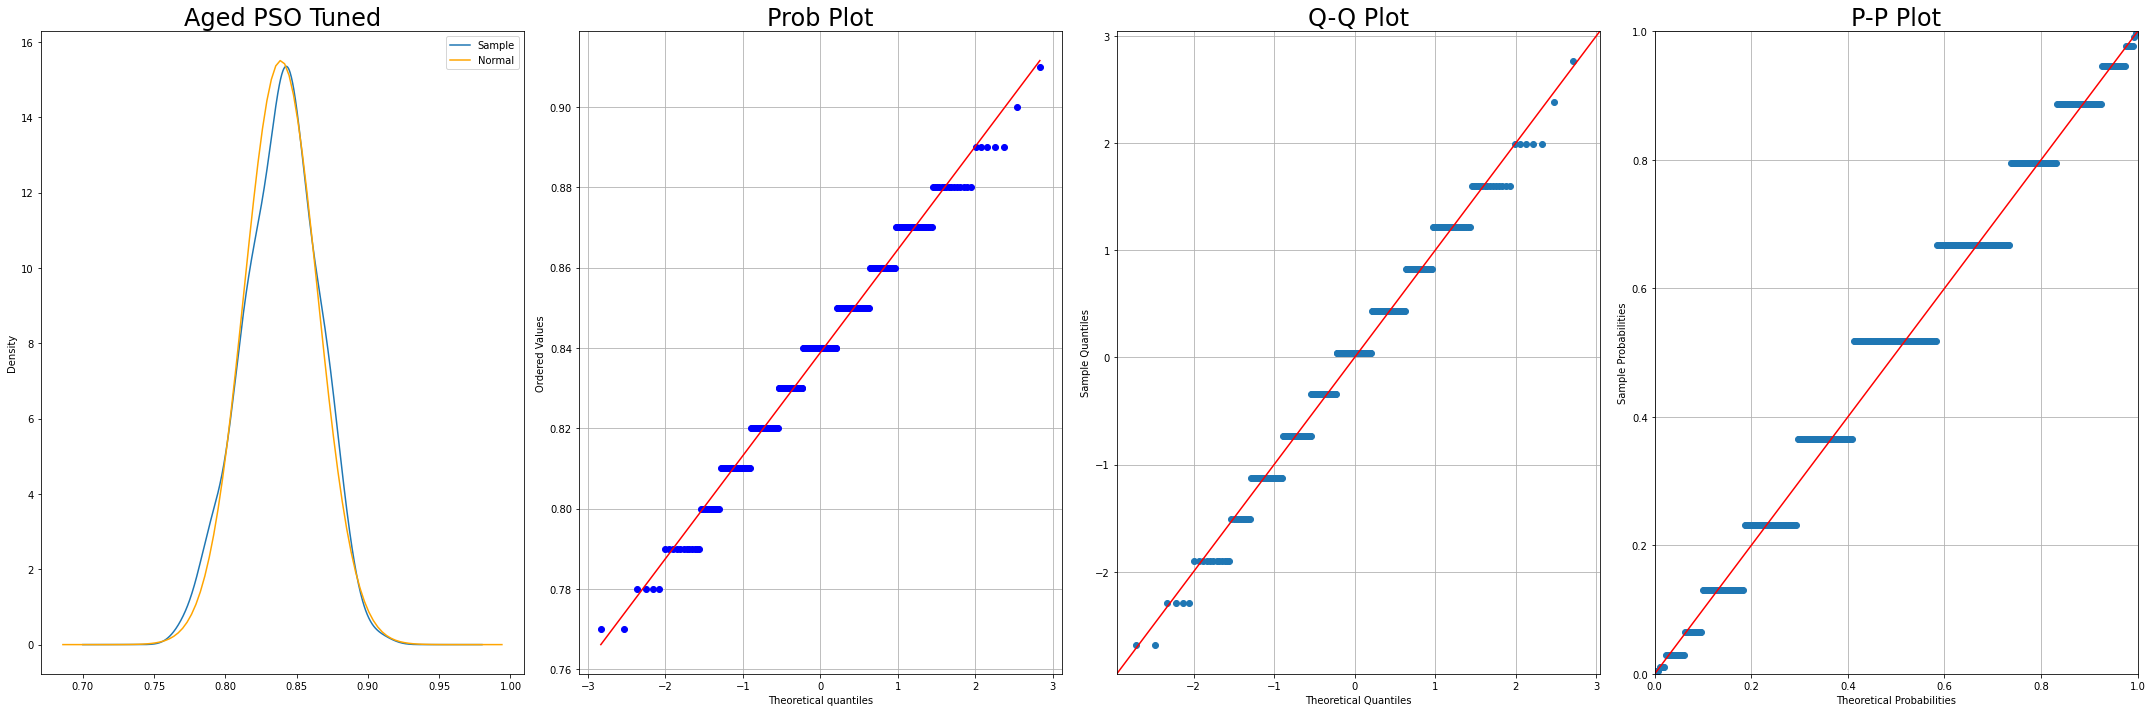

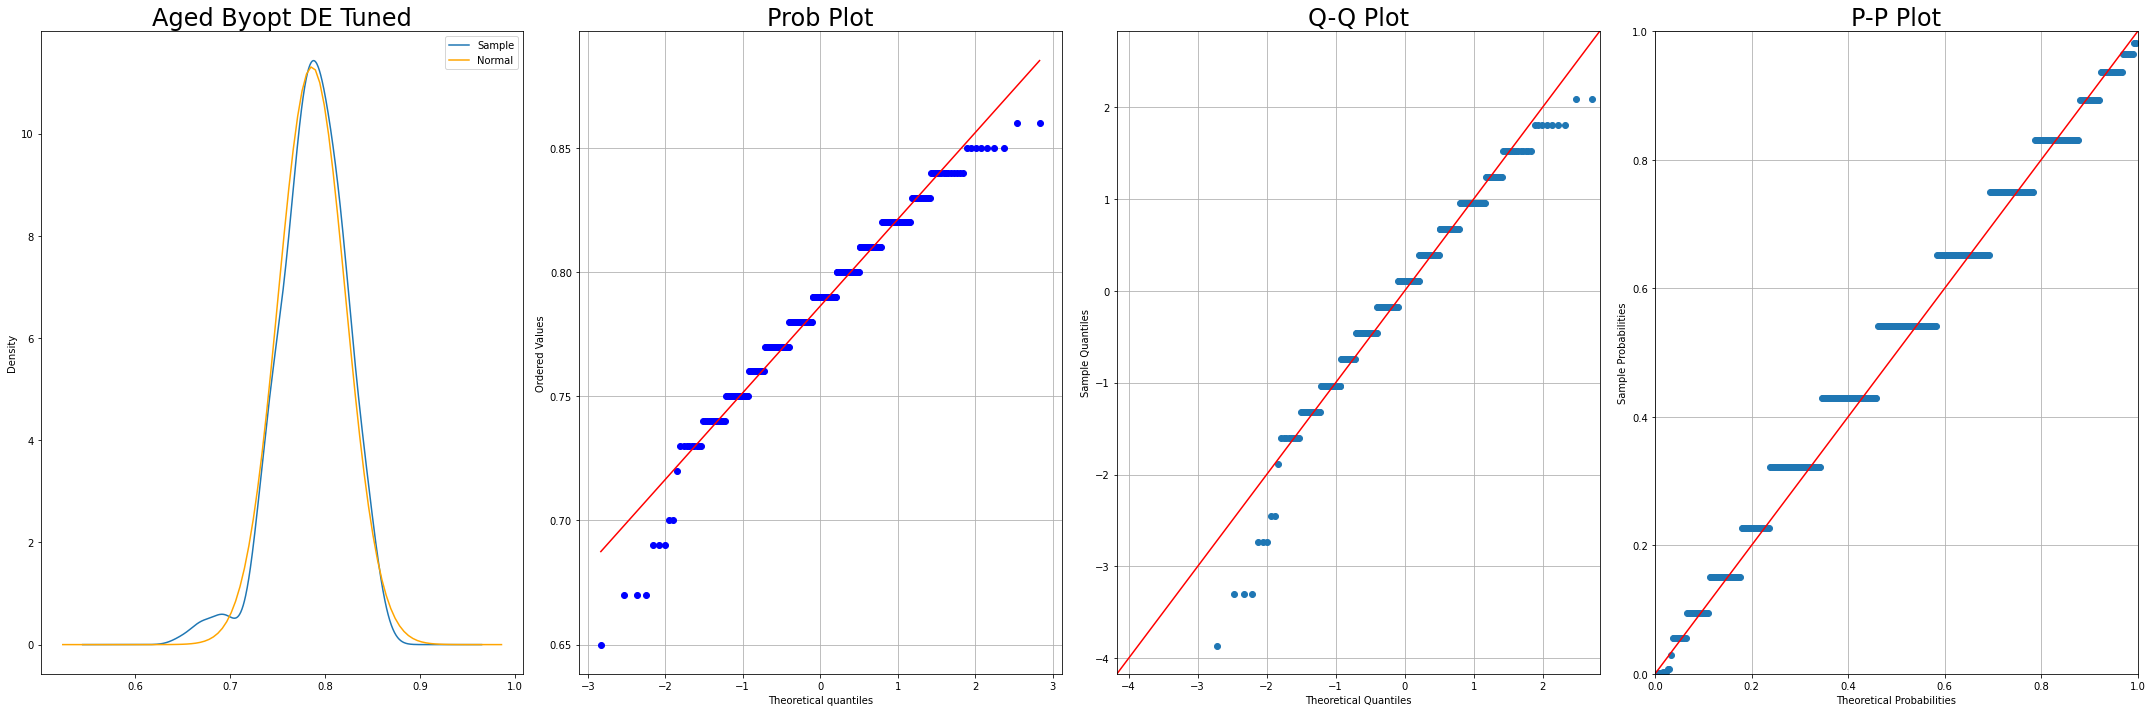

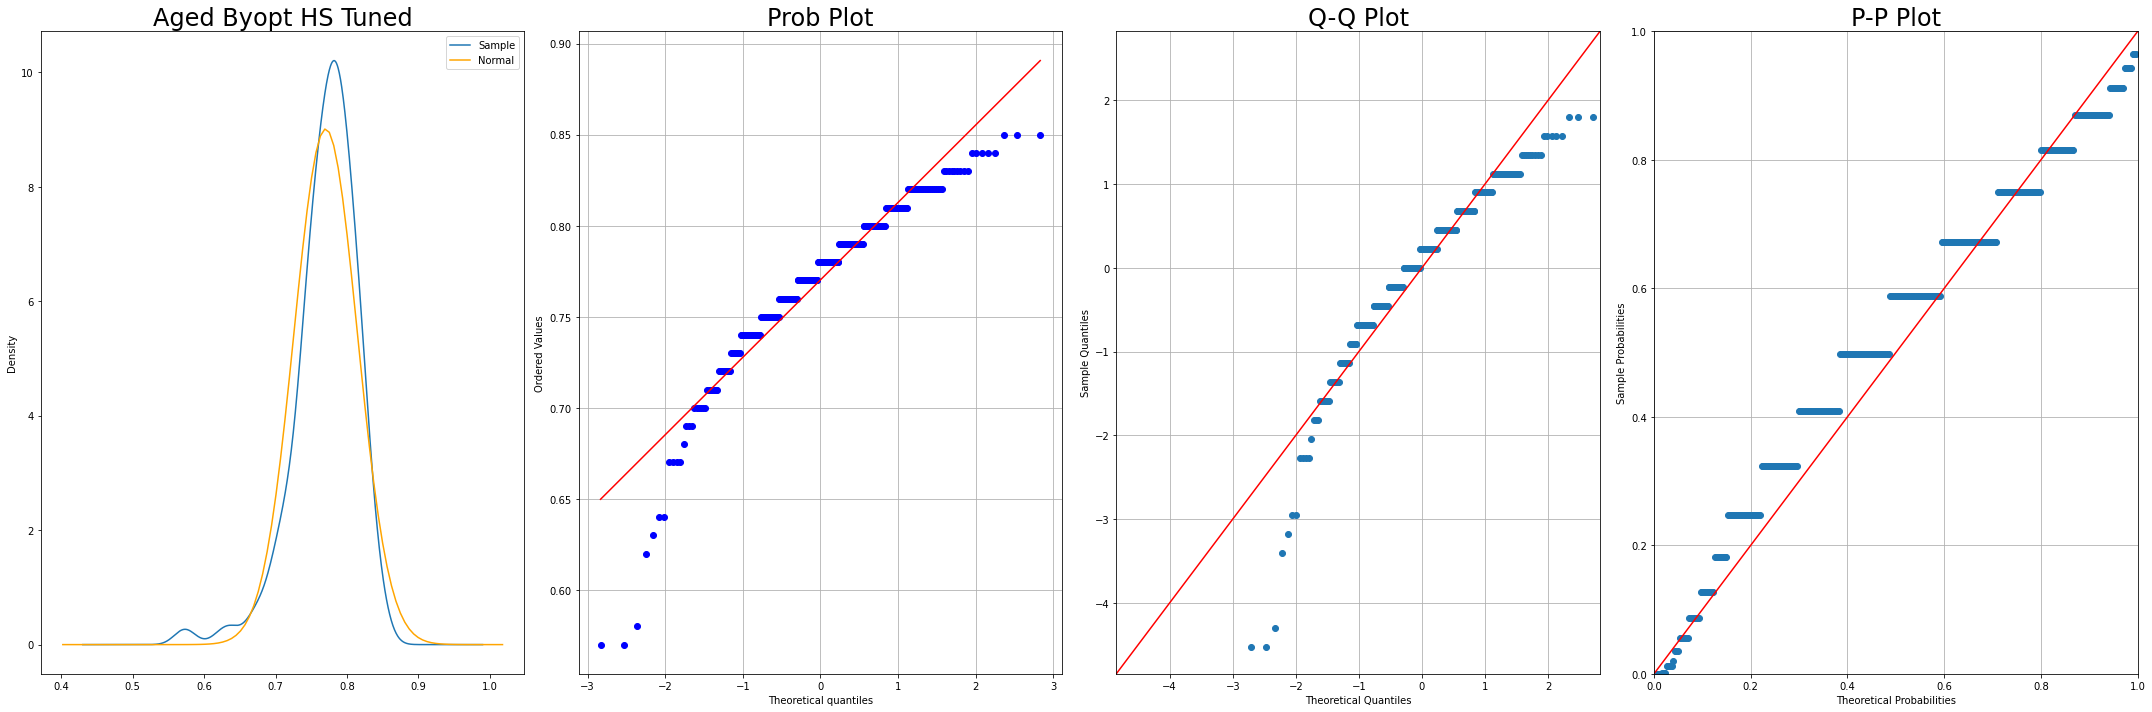

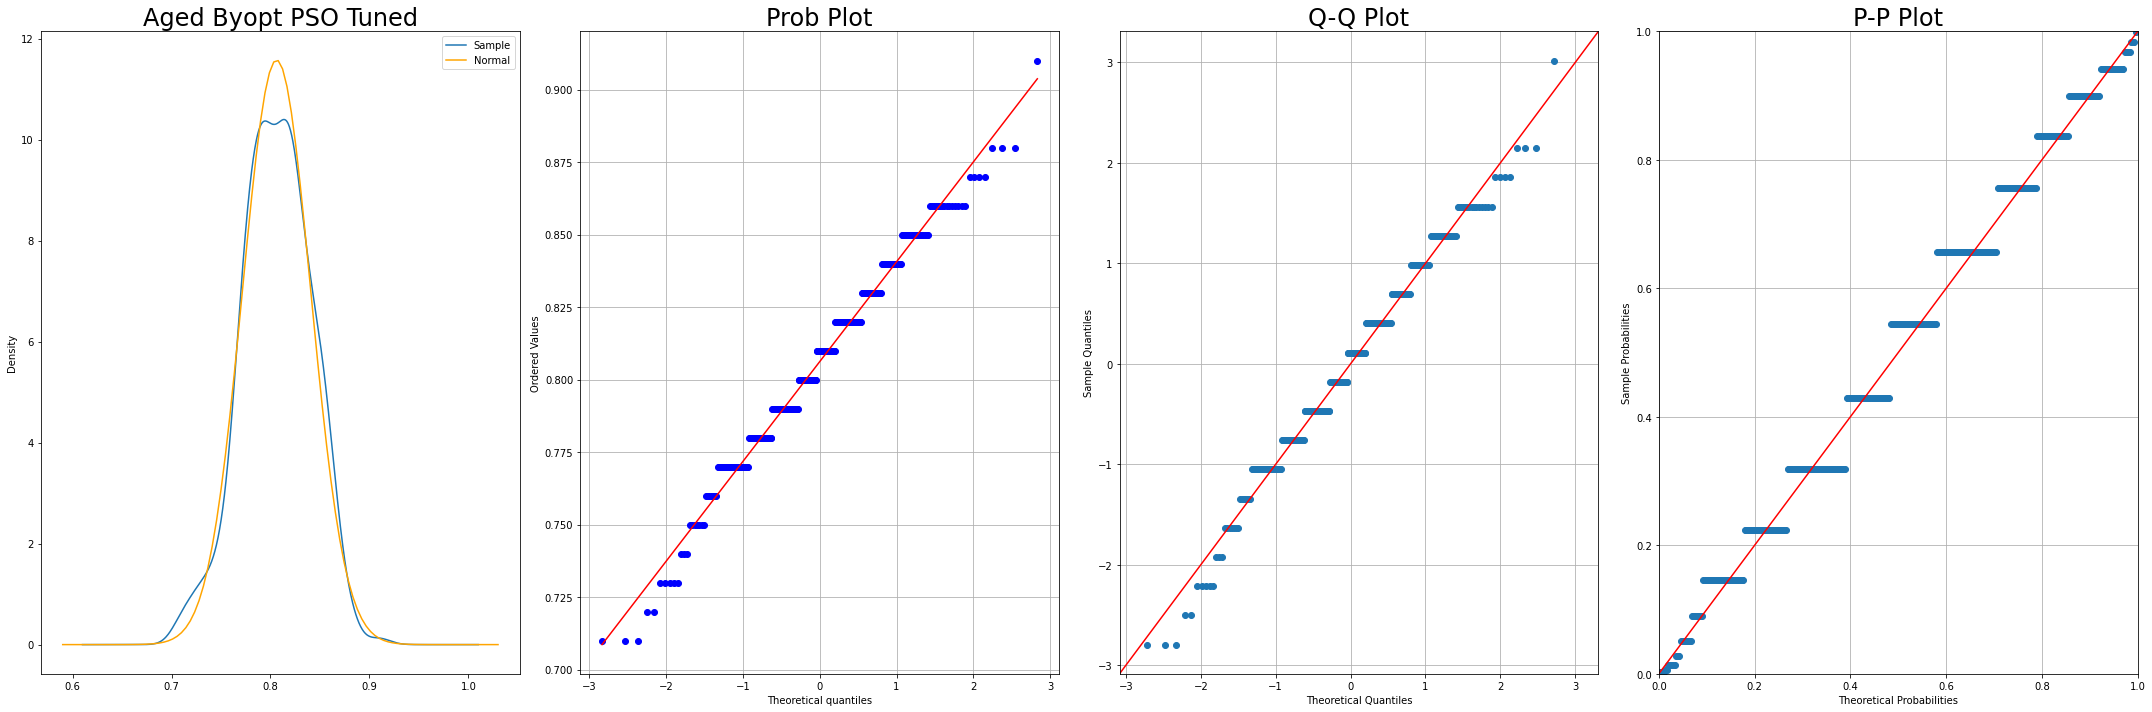

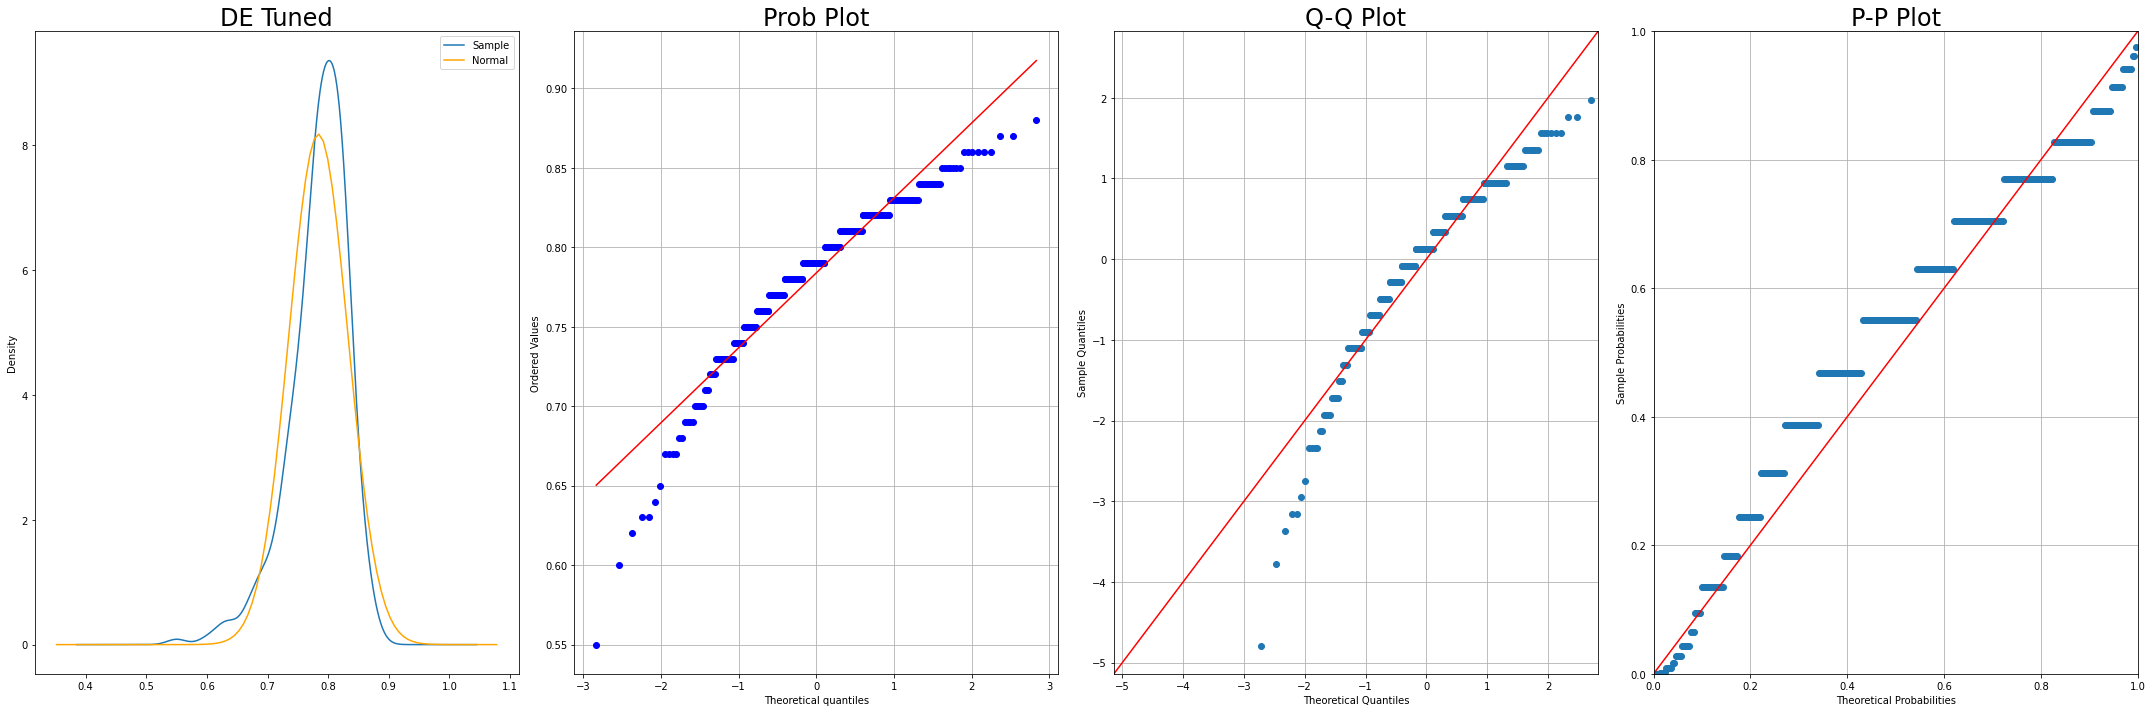

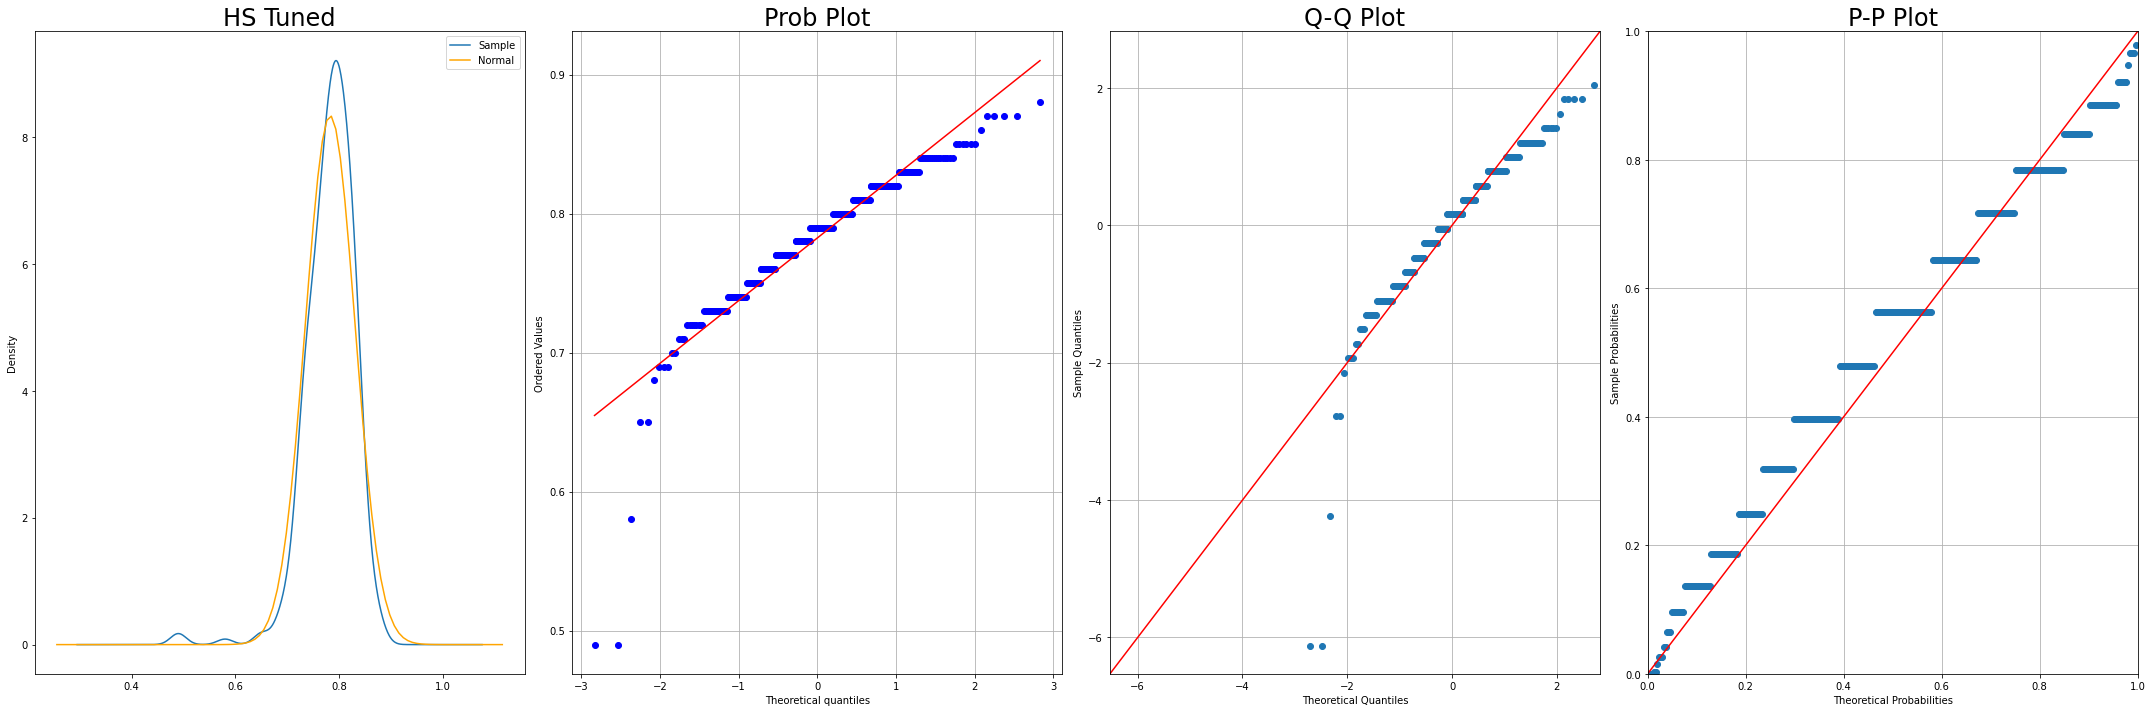

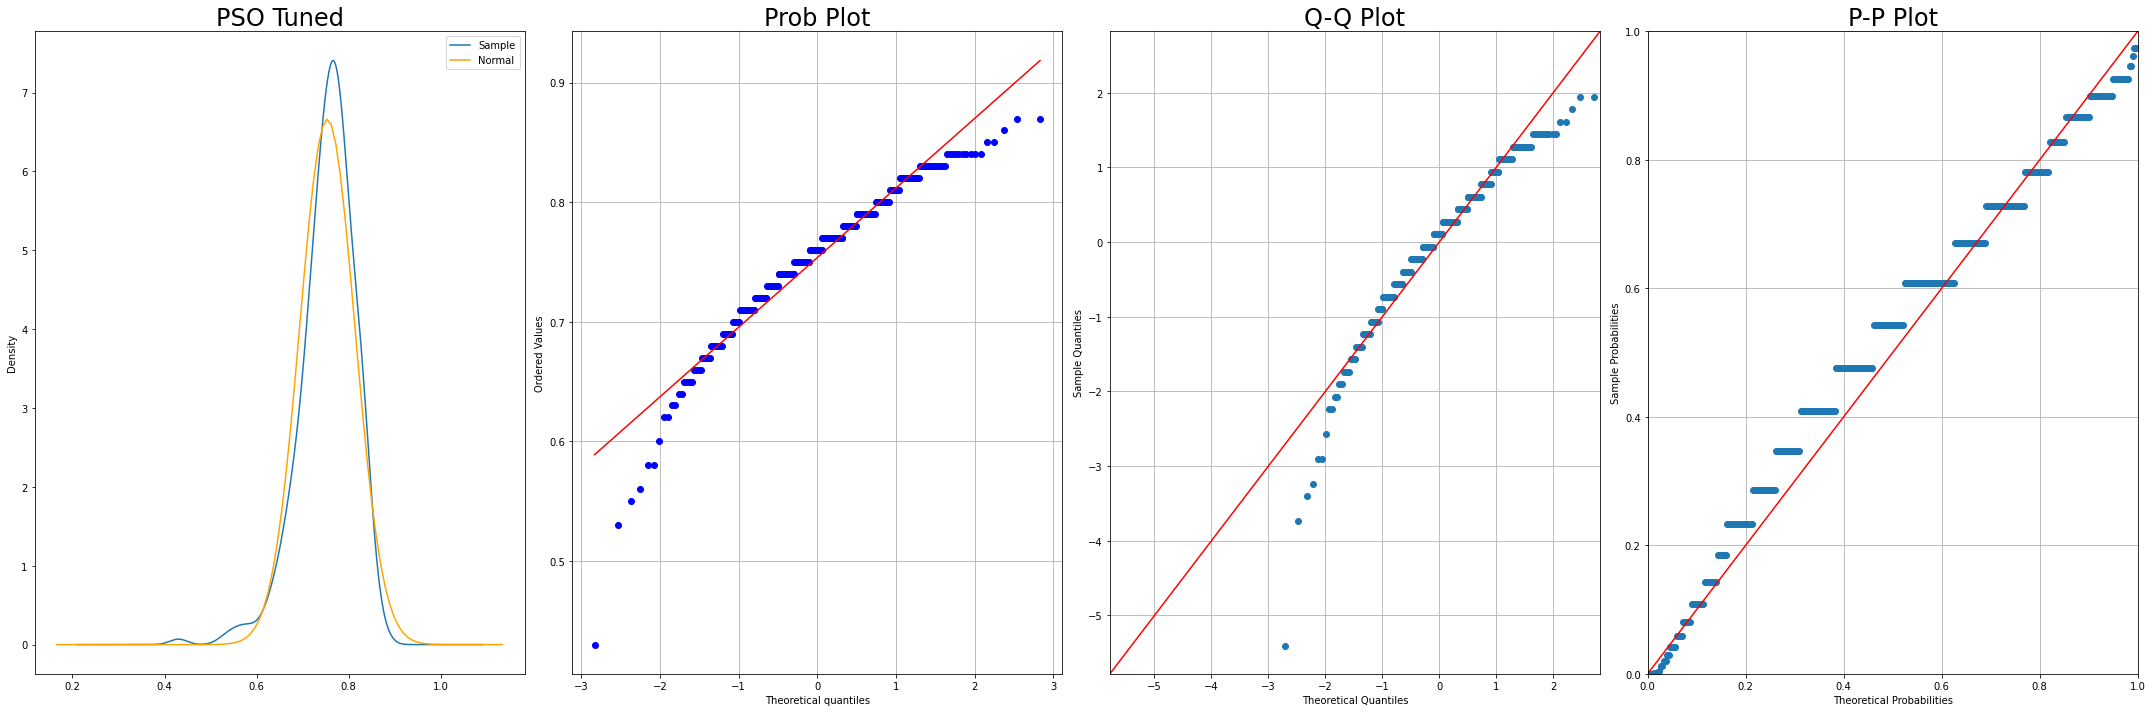

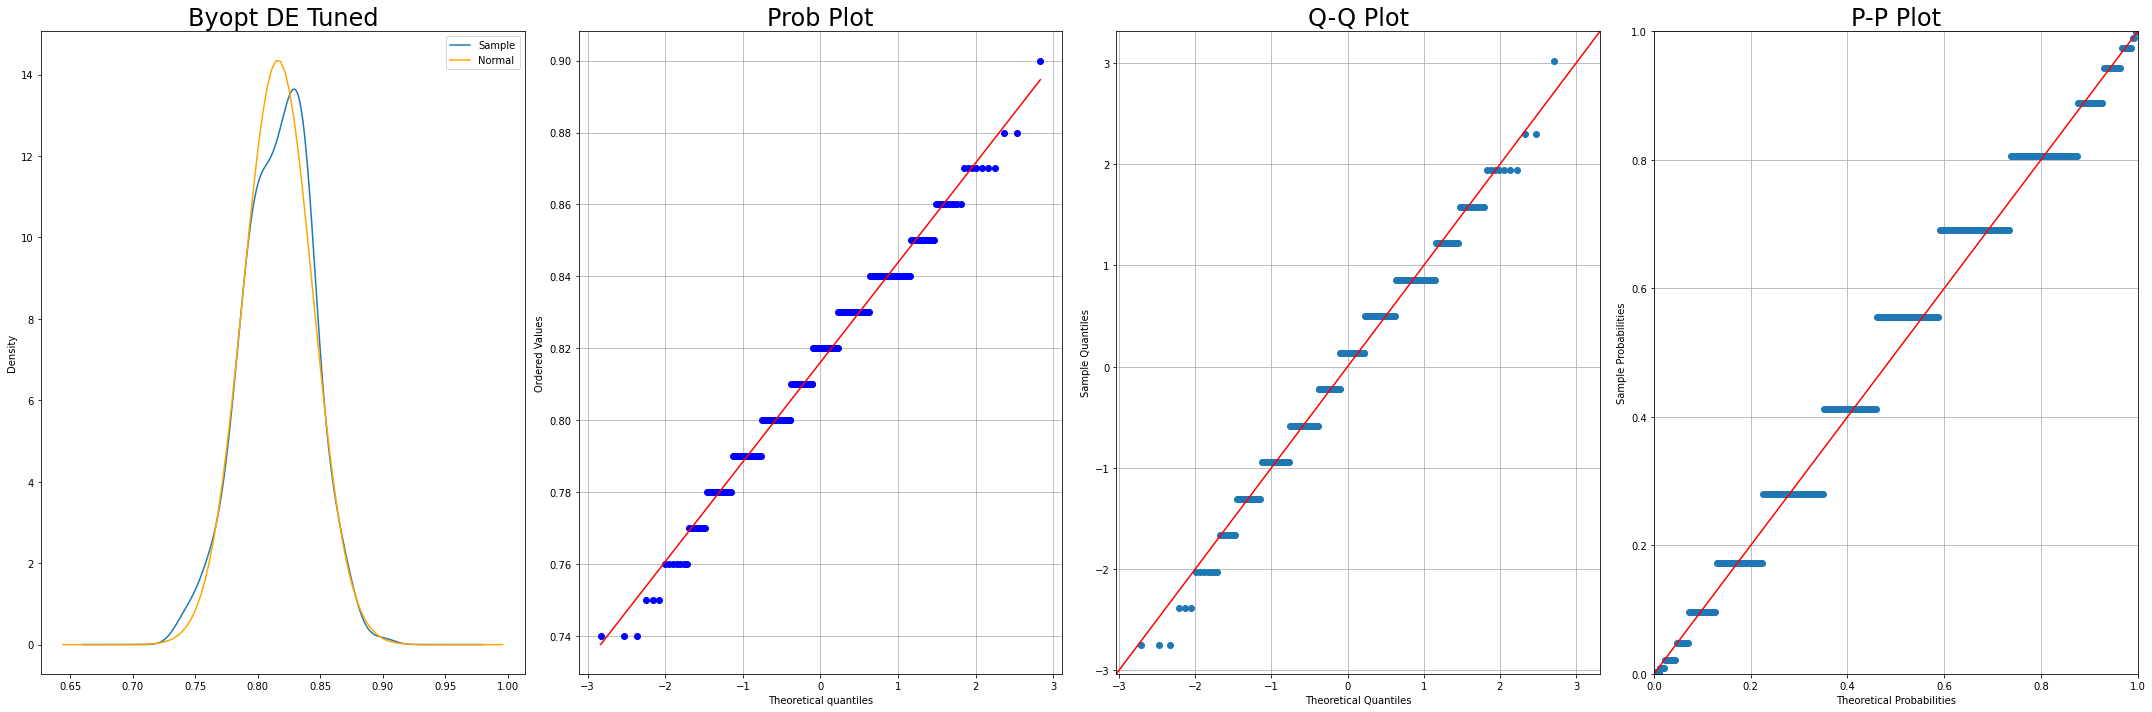

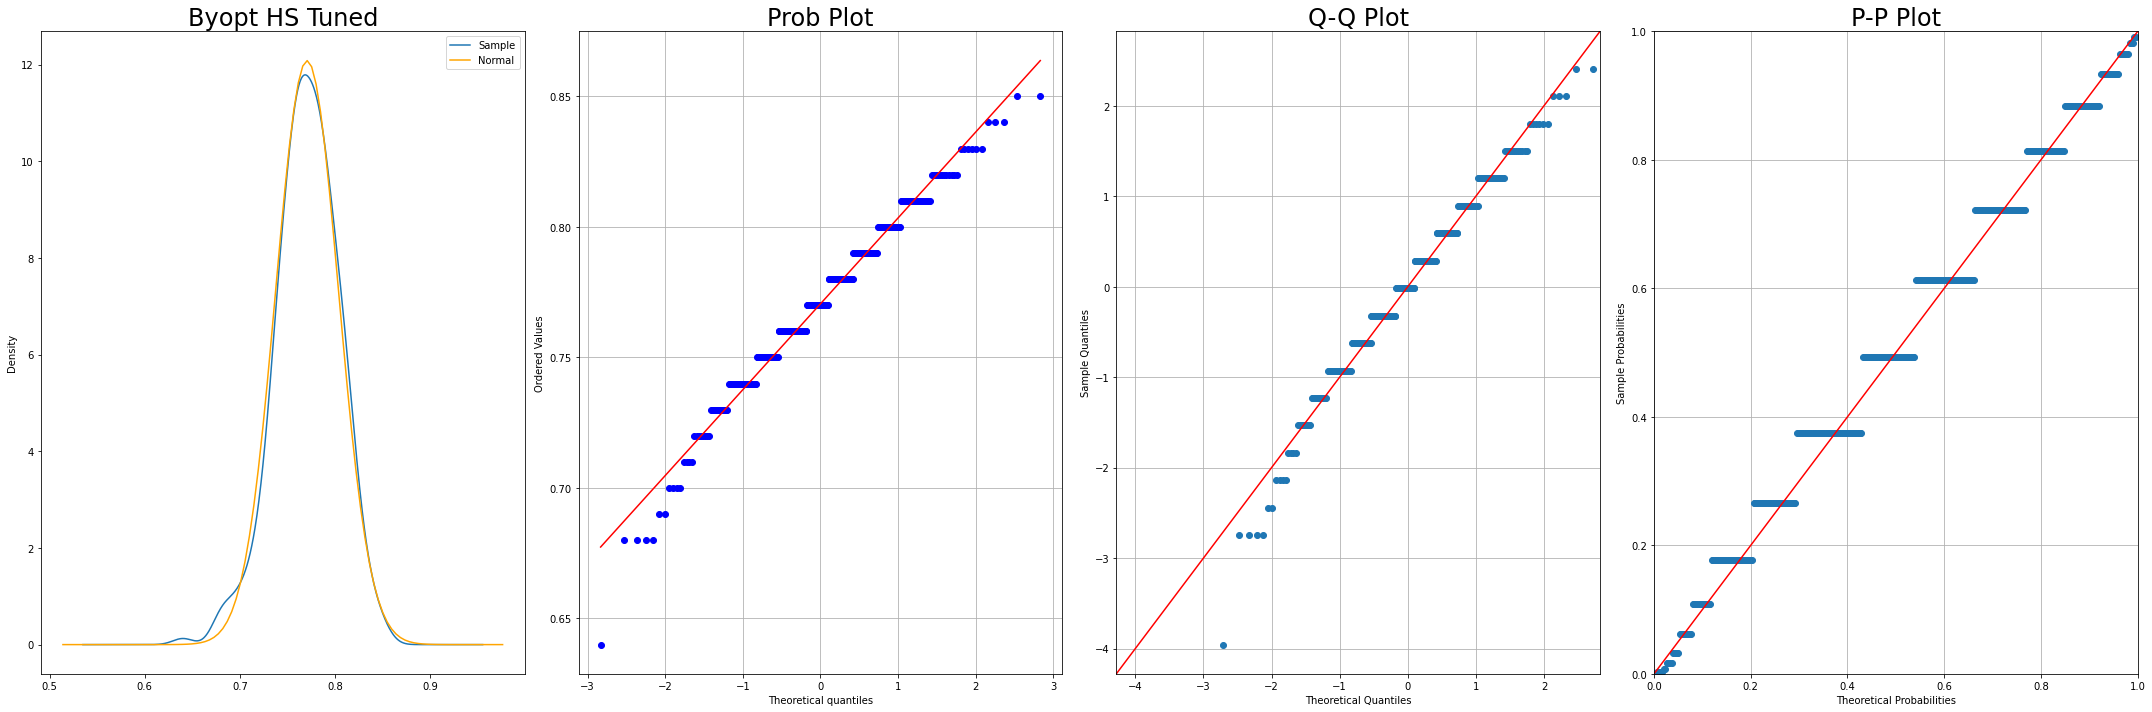

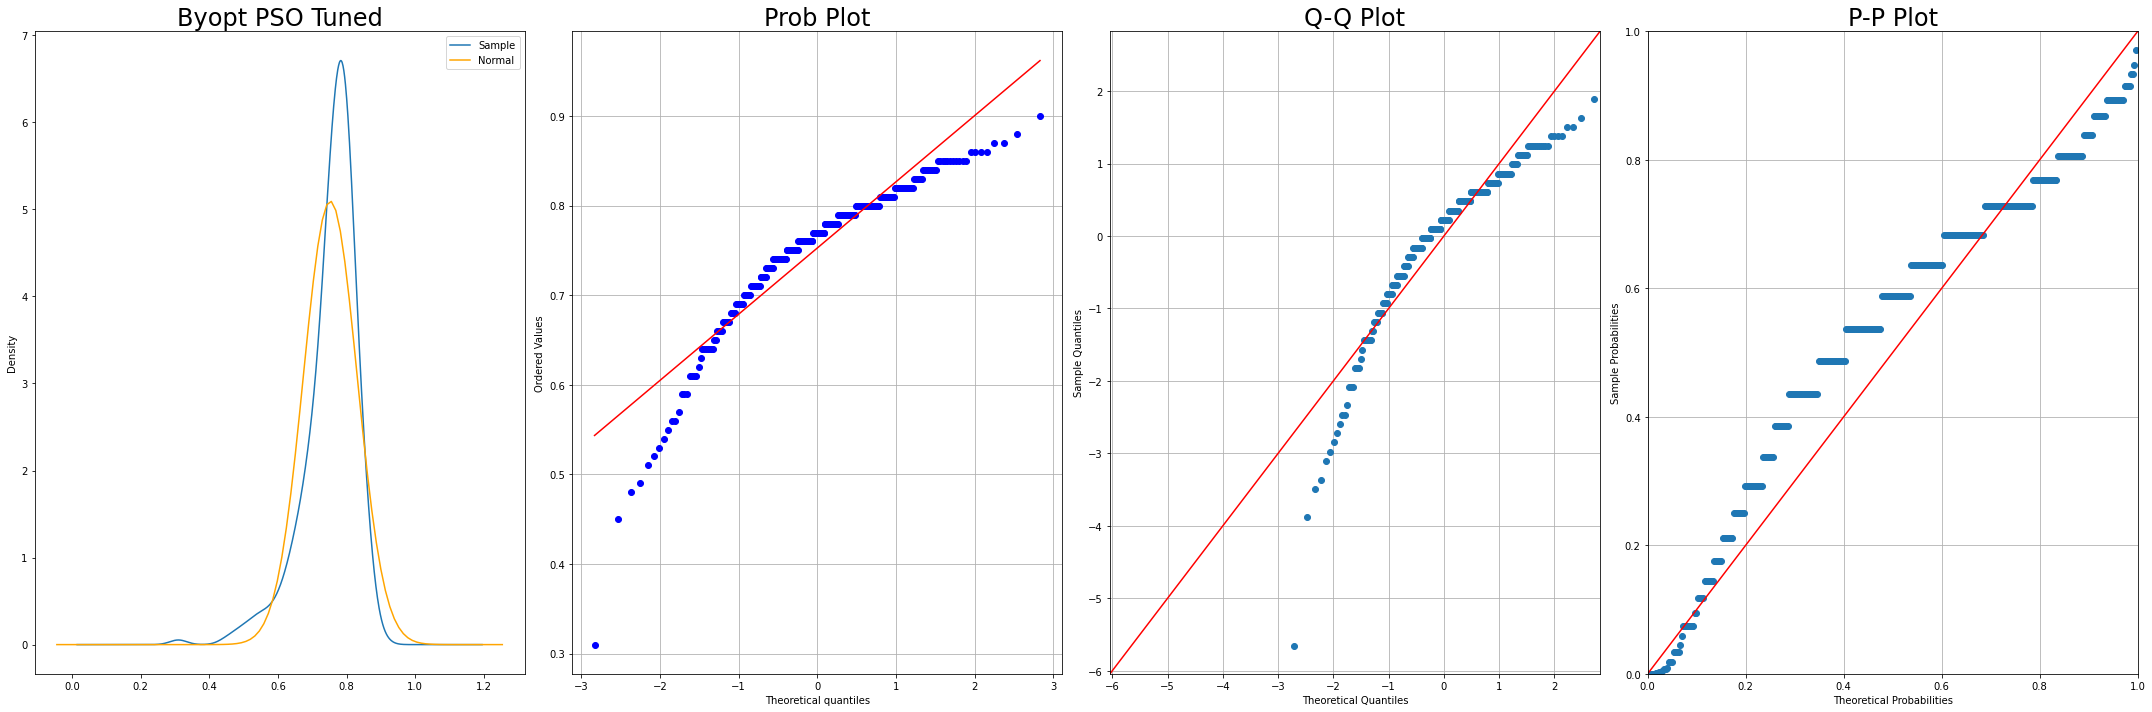

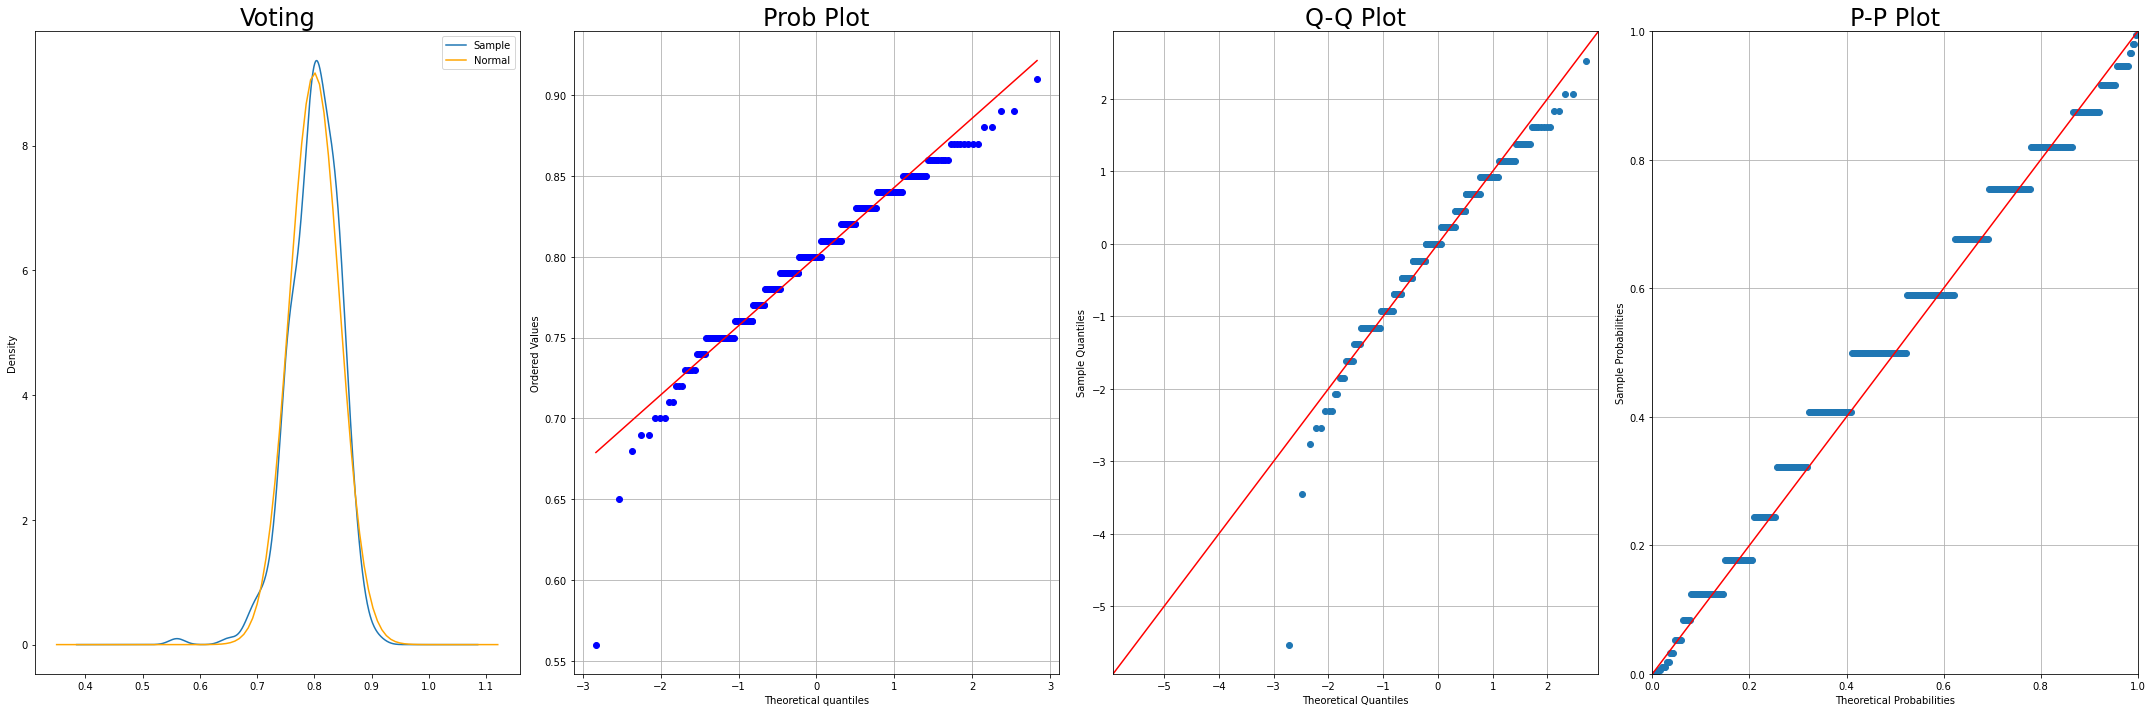

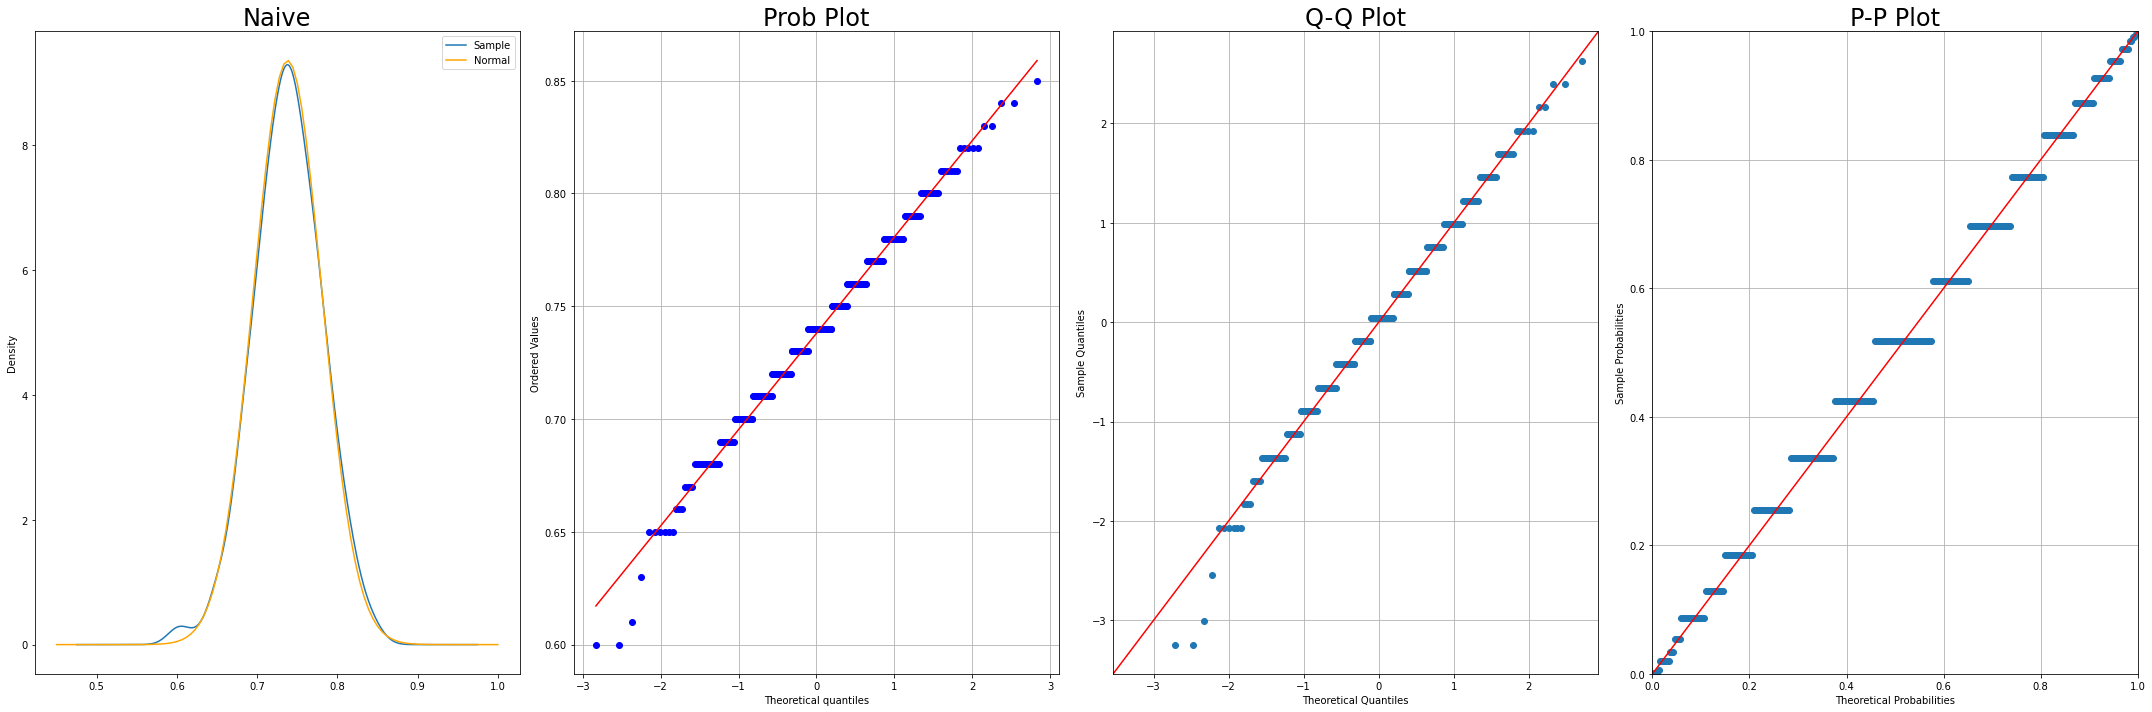

In [114]:

for idx, col in enumerate(df.columns):
    fig, axes = plt.subplots(1, 4, figsize=(30, 10))

    # KDE Plot
    df[col].plot.kde(label="Sample", ax=axes[0])
    x0, x1 = axes[0].get_xlim()
    x_pdf = np.linspace(x0, x1, 100)
    y_pdf = stats.norm.pdf(x_pdf, loc=analysis.loc[col, "mean_accuracy"], scale=analysis.loc[col, "std"])
    axes[0].plot(x_pdf, y_pdf, label="Normal", color="orange")
    axes[0].set_title(col, fontsize=24)
    axes[0].grid()
    axes[0].legend()

    # PQ Plot
    stats.probplot(df[col], dist="norm", plot=axes[1])

    sample = sm.ProbPlot(df[col], loc=analysis.loc[col, "mean_accuracy"], scale=analysis.loc[col, "std"],
                        fit=True)
    # QQ Plot
    sample.qqplot(ax=axes[2], line="45")

    # PP Plot
    sample.ppplot(ax=axes[3], line="45")

    for ax, title in zip(axes, [col, "Prob Plot", "Q-Q Plot", "P-P Plot"]):
        ax.set_title(title, fontsize=24)
        ax.grid()

    plt.tight_layout()
    plt.savefig(f"result/image/pp_plot/{col}_plot.png")
    plt.show()

- From here, we can observe that our samples are actually discrete since the satirstep pattern occurs.
- But it is logical for us to assume the underlying distribution of the population is continuous since we cannot try every combination of parameter between the hidden layers.

# Normality Test
- Carry out several suitable normality tests
    - &#10003; Shapiro–Wilk test
    - &#10003; Anderson–Darling test
    - &#10003; D'Agostino's K-squared test
    - Jarque–Bera test
    - Cramér–von Mises criterion
    - Kolmogorov–Smirnov test
    - Lilliefors test
- Since the results given by each test are different, we choose the result that agreed by most of the tests.
- There is no significant departure from normality in the underlying population distribution based on the available sample data.

In [115]:
test_func = [
    stats.shapiro, 
    # stats.jarque_bera, 
    stats.normaltest,
    # stats.kstest, 
    # stats.cramervonmises, 
    stats.anderson,
    # diagnostic.lilliefors
    ]
test_name = [
    "shapiro-wilk", 
    # "jarque-bera", 
    "d'agostino's", 
    # "kolmogorov-smirov", 
    # "cramer-von-mises", 
    "anderson", 
    # "lilliefors"
]

for name, func in zip(test_name, test_func):
    normality = []
    for col in df.columns:
        if name in ["shapiro-wilk", "jarque-bera", "d'agostino's"]:
            normality.append("normal" if func(df[col]).pvalue > 0.05 else "not normal")
        elif name in ["kolmogorov-smirov", "cramer-von-mises"]:
            normality.append("normal" if func(df[col], cdf="norm").pvalue > 0.05 else "not normal")
        elif name == "anderson":
            res = stats.anderson(df[col], dist="norm")
            normality.append("normal" if res[0] > res[1][2] else "not normal")
        elif name == "lilliefors":
            normality.append("normal" if diagnostic.lilliefors(df[col])[1] > 0.05 else "not normal")
    analysis[name] = normality
not_normal_count = analysis.apply(lambda r:r.str.contains("not normal").sum(), axis=1)
normality = ["not normal" if x > len(test_name) / 2 else "normal" for x in not_normal_count]
analysis["normality"] = normality
analysis

,best_accuracy,max_accuracy,min_accuracy,mean_accuracy,PI(best_fitness over naive),PI(mean over naive mean),PI(max over naive max),PRD(max vs best_fitness),skewness,kurtosis,std,shapiro-wilk,d'agostino's,anderson,normality
Aged DE Tuned,0.94,0.88,0.62,0.797067,0.105882,0.079987,0.035294,0.0659,-0.563683,1.050164,0.037693,not normal,not normal,normal,not normal
Aged HS Tuned,0.87,0.86,0.51,0.777733,0.023529,0.053792,0.011765,0.0116,-1.318221,3.678665,0.048656,not normal,not normal,normal,not normal
Aged PSO Tuned,0.90,0.91,0.77,0.838833,0.058824,0.136579,0.070588,0.0110,-0.174784,-0.238688,0.025726,not normal,normal,normal,normal
Aged Byopt DE Tuned,0.86,0.86,0.65,0.786300,0.011765,0.065399,0.011765,0.0000,-0.654741,1.080759,0.035282,not normal,not normal,normal,not normal
Aged Byopt HS Tuned,0.86,0.85,0.57,0.770233,0.011765,0.043629,0.000000,0.0117,-1.385112,3.628307,0.044274,not normal,not normal,normal,not normal
Aged Byopt PSO Tuned,0.88,0.91,0.71,0.806167,0.035294,0.092317,0.070588,0.0335,-0.183008,0.020675,0.034462,not normal,normal,normal,normal
DE Tuned,0.88,0.88,0.55,0.783867,0.035294,0.062102,0.035294,0.0000,-1.246771,2.593043,0.048802,not normal,not normal,normal,not normal
HS Tuned,0.89,0.88,0.49,0.782433,0.047059,0.060160,0.035294,0.0113,-1.900475,9.056414,0.047854,not normal,not normal,normal,not normal
PSO Tuned,0.89,0.87,0.43,0.753633,0.047059,0.021137,0.023529,0.0227,-1.210384,3.374937,0.059881,not normal,not normal,normal,not normal
Byopt DE Tuned,0.90,0.90,0.74,0.816133,0.058824,0.105822,0.058823,0.0000,-0.197353,-0.005680,0.027778,not normal,normal,normal,normal


# Find the Intervals that contain $p\%$ of the population

In [117]:
k = [np.sqrt(2), 
    # 1.5, 
    2, 2 * np.sqrt(2), 3, 4, 5, ]
p = ["50%", 
    # "55.56%", 
    "75%", "87.5%", "88.89%", "93.75%", "96%", ]

normal_pop = analysis[analysis["normality"] == "normal"].index
for _ , p_ in zip(k, p):
    ub = analysis["mean_accuracy"].values + _ * analysis["std"].values
    lb = analysis["mean_accuracy"].values - _ * analysis["std"].values
    interval = np.array([lb, ub]).clip(max=1.0)
    interval = [list(np.round(interval[:, idx], 6)) for idx in range(interval.shape[1])]
    analysis[p_ + f"({_:.4f} std)"] = interval
    analysis.loc[normal_pop, p_ + f"({_:.4f} std)"] = "/"

k_norm = [1, 2, 3]
p_norm = ["68%", "98%", "99.7%"]

non_normal_pop = analysis[analysis["normality"] == "not normal"].index
for _ , p_ in zip(k_norm, p_norm):
    ub = analysis["mean_accuracy"].values + _ * analysis["std"].values
    lb = analysis["mean_accuracy"].values - _ * analysis["std"].values
    interval = np.array([lb, ub]).clip(max=1.0)
    interval = [list(np.round(interval[:, idx], 6)) for idx in range(interval.shape[1])]
    analysis[p_ + f"({_:.4f} std)"] = interval
    analysis.loc[non_normal_pop, p_ + f"({_:.4f} std)"] = "/"

analysis.to_csv("result/analysis.csv")
analysis


,best_accuracy,max_accuracy,min_accuracy,mean_accuracy,PI(best_fitness over naive),PI(mean over naive mean),PI(max over naive max),PRD(max vs best_fitness),skewness,kurtosis,...,normality,50%(1.4142 std),75%(2.0000 std),87.5%(2.8284 std),88.89%(3.0000 std),93.75%(4.0000 std),96%(5.0000 std),68%(1.0000 std),98%(2.0000 std),99.7%(3.0000 std)
Aged DE Tuned,0.94,0.88,0.62,0.797067,0.105882,0.079987,0.035294,0.0659,-0.563683,1.050164,...,not normal,"[0.74376, 0.850373]","[0.72168, 0.872454]","[0.690453, 0.90368]","[0.683986, 0.910147]","[0.646293, 0.947841]","[0.608599, 0.985534]",/,/,/
Aged HS Tuned,0.87,0.86,0.51,0.777733,0.023529,0.053792,0.011765,0.0116,-1.318221,3.678665,...,not normal,"[0.708923, 0.846544]","[0.680421, 0.875046]","[0.640113, 0.915354]","[0.631765, 0.923702]","[0.583109, 0.972358]","[0.534453, 1.0]",/,/,/
Aged PSO Tuned,0.90,0.91,0.77,0.838833,0.058824,0.136579,0.070588,0.0110,-0.174784,-0.238688,...,normal,/,/,/,/,/,/,"[0.813107, 0.86456]","[0.787381, 0.890286]","[0.761654, 0.916012]"
Aged Byopt DE Tuned,0.86,0.86,0.65,0.786300,0.011765,0.065399,0.011765,0.0000,-0.654741,1.080759,...,not normal,"[0.736404, 0.836196]","[0.715737, 0.856863]","[0.686509, 0.886091]","[0.680455, 0.892145]","[0.645174, 0.927426]","[0.609892, 0.962708]",/,/,/
Aged Byopt HS Tuned,0.86,0.85,0.57,0.770233,0.011765,0.043629,0.000000,0.0117,-1.385112,3.628307,...,not normal,"[0.707621, 0.832846]","[0.681686, 0.85878]","[0.645009, 0.895458]","[0.637413, 0.903054]","[0.593139, 0.947327]","[0.548866, 0.991601]",/,/,/
Aged Byopt PSO Tuned,0.88,0.91,0.71,0.806167,0.035294,0.092317,0.070588,0.0335,-0.183008,0.020675,...,normal,/,/,/,/,/,/,"[0.771705, 0.840628]","[0.737244, 0.87509]","[0.702782, 0.909551]"
DE Tuned,0.88,0.88,0.55,0.783867,0.035294,0.062102,0.035294,0.0000,-1.246771,2.593043,...,not normal,"[0.71485, 0.852883]","[0.686262, 0.881471]","[0.645833, 0.9219]","[0.63746, 0.930273]","[0.588658, 0.979075]","[0.539856, 1.0]",/,/,/
HS Tuned,0.89,0.88,0.49,0.782433,0.047059,0.060160,0.035294,0.0113,-1.900475,9.056414,...,not normal,"[0.714757, 0.85011]","[0.686724, 0.878142]","[0.647081, 0.917786]","[0.63887, 0.925997]","[0.591016, 0.973851]","[0.543161, 1.0]",/,/,/
PSO Tuned,0.89,0.87,0.43,0.753633,0.047059,0.021137,0.023529,0.0227,-1.210384,3.374937,...,not normal,"[0.668949, 0.838318]","[0.633871, 0.873396]","[0.584264, 0.923003]","[0.57399, 0.933277]","[0.514109, 0.993158]","[0.454228, 1.0]",/,/,/
Byopt DE Tuned,0.90,0.90,0.74,0.816133,0.058824,0.105822,0.058823,0.0000,-0.197353,-0.005680,...,normal,/,/,/,/,/,/,"[0.788355, 0.843911]","[0.760577, 0.871689]","[0.732799, 0.899468]"


# Visualize Intervals
- $p\%$ of data will fall in $\mu\pm\sigma$

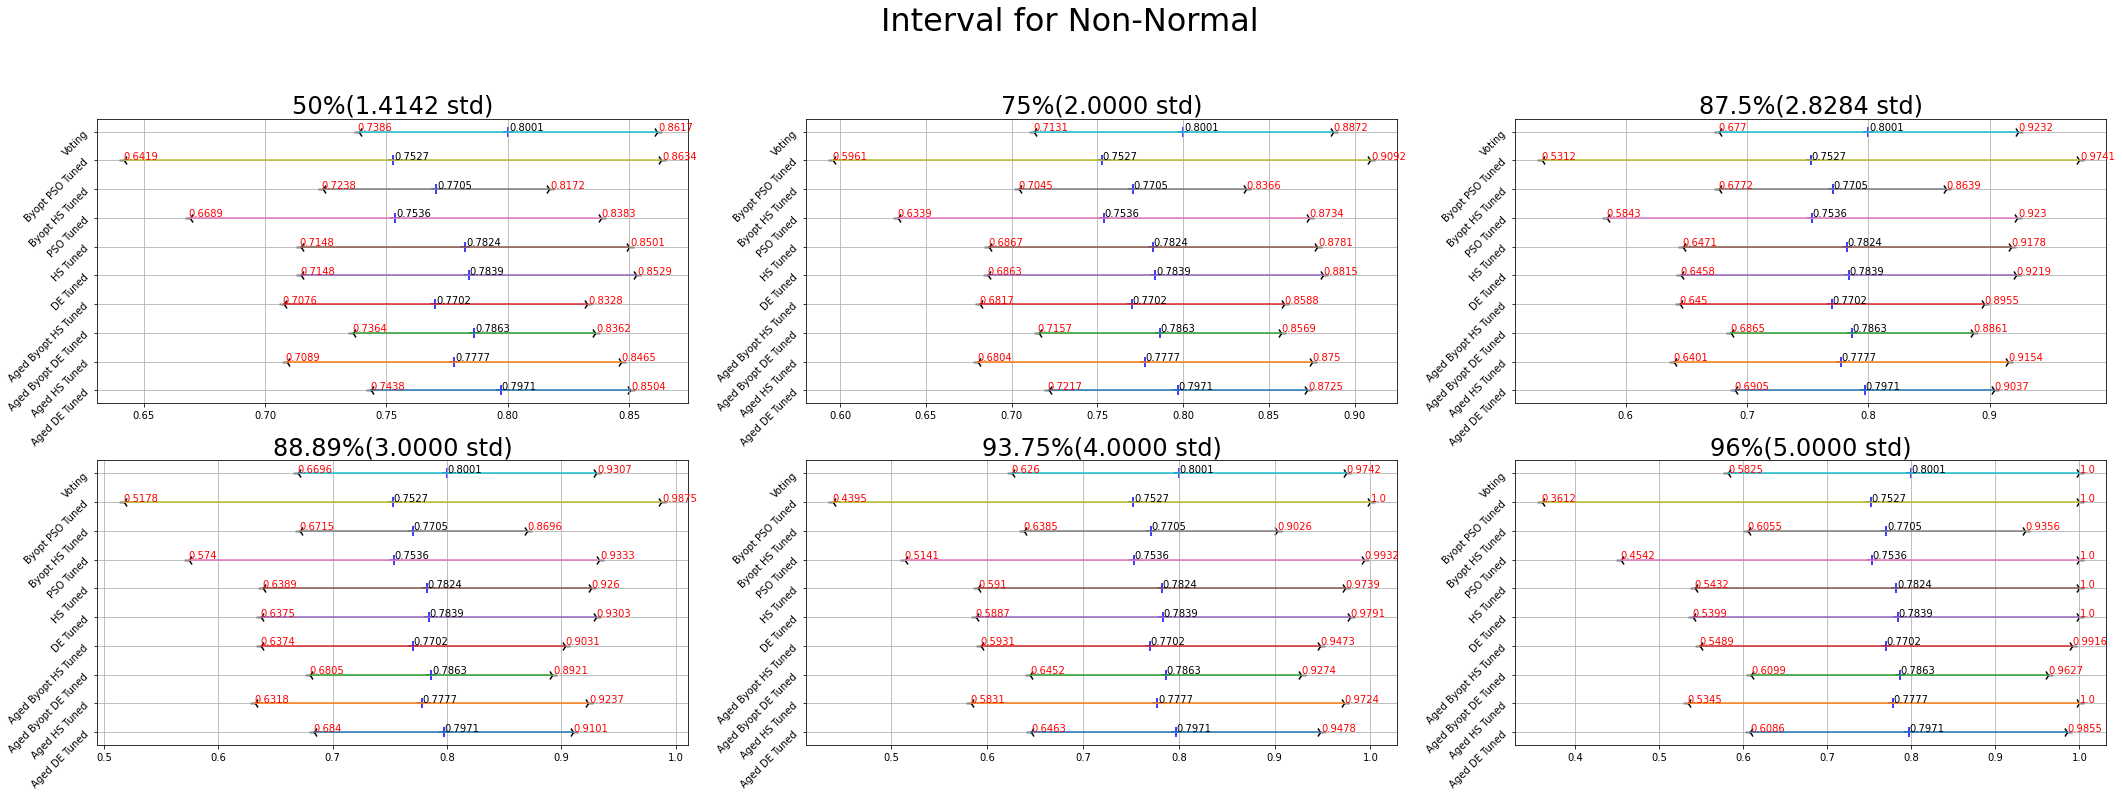

In [118]:
plt.figure(figsize=(36, 12))
for _ , p_, idx in zip(k, p, range(len(p))):
    ptr = 0
    plt.subplot(2, 3, idx + 1)
    x = analysis[p_ + f"({_:.4f} std)"]
    mean = analysis["mean_accuracy"]
    for jdx in range(len(df.columns)):
        if x.values[jdx] != "/":
            plt.plot(x.values[jdx], [jdx - ptr, jdx - ptr], label=df.columns[jdx])
            plt.scatter(mean.values[jdx], [jdx - ptr], label=df.columns[jdx], marker="+", s=100, c="blue")
            plt.scatter(x.values[jdx][0], [jdx - ptr], label=df.columns[jdx], marker="3", s=100, c="black")
            plt.scatter(x.values[jdx][1], [jdx - ptr], label=df.columns[jdx], marker="4", s=100, c="black")

            plt.annotate(round(mean.values[jdx], 4),
                        xy=(mean.values[jdx], jdx - ptr),
                        xytext=(mean.values[jdx] + 0.0005, jdx - ptr + 0.15),
                        ha='left', va='center', color='black')
            plt.annotate(round(x.values[jdx][0], 4),
                        xy=(x.values[jdx][0], jdx - ptr),
                        xytext=(x.values[jdx][0] - 0.0005, jdx - ptr + 0.15),
                        ha='left', va='center', color='red')
            plt.annotate(round(x.values[jdx][1], 4),
                        xy=(x.values[jdx][1], jdx - ptr),
                        xytext=(x.values[jdx][1] + 0.0005, jdx - ptr + 0.15),
                        ha='left', va='center', color='red')
            plt.title(p_ + f"({_:.4f} std)", fontsize=24)
        else:
            ptr += 1
    plt.grid()
    plt.yticks([y for y in range(len(non_normal_pop))], non_normal_pop, rotation=45)
plt.suptitle("Interval for Non-Normal", fontsize=32)
plt.subplots_adjust(top=0.85)
plt.savefig("result/image/interval_plot/interval non-normal.png")
plt.show()



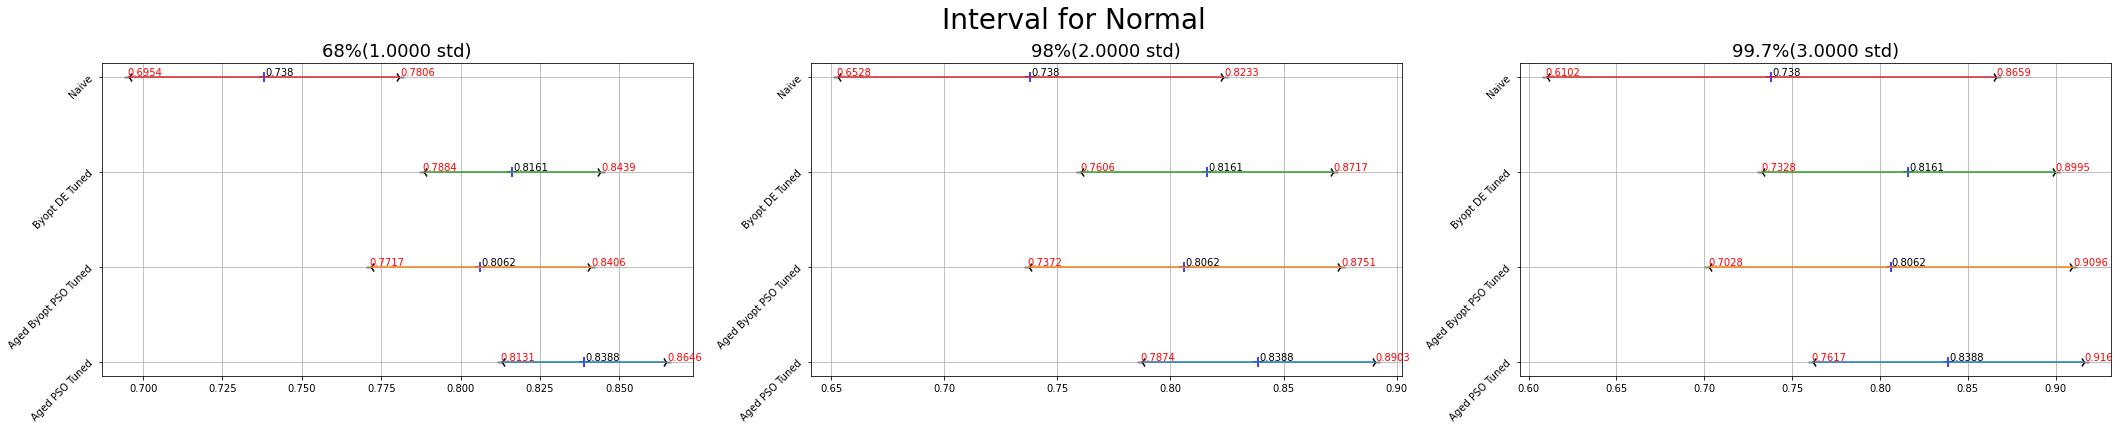

In [119]:
plt.figure(figsize=(36, 6))
for _ , p_, idx in zip(k_norm, p_norm, range(len(p_norm))):
    ptr = 0
    plt.subplot(1, 3, idx + 1)
    x = analysis[p_ + f"({_:.4f} std)"]
    mean = analysis["mean_accuracy"]
    for jdx in range(len(df.columns)):
        if x.values[jdx] != "/":
            plt.plot(x.values[jdx], [jdx - ptr, jdx - ptr], label=df.columns[jdx])
            plt.scatter(mean.values[jdx], [jdx - ptr], label=df.columns[jdx], marker="+", s=100, c="blue")
            plt.scatter(x.values[jdx][0], [jdx - ptr], label=df.columns[jdx], marker="3", s=100, c="black")
            plt.scatter(x.values[jdx][1], [jdx - ptr], label=df.columns[jdx], marker="4", s=100, c="black")

            plt.annotate(round(mean.values[jdx], 4),
                        xy=(mean.values[jdx], jdx - ptr),
                        xytext=(mean.values[jdx] + 0.0005, jdx - ptr + 0.05),
                        ha='left', va='center', color='black')
            plt.annotate(round(x.values[jdx][0], 4),
                        xy=(x.values[jdx][0], jdx - ptr),
                        xytext=(x.values[jdx][0] - 0.0005, jdx - ptr + 0.05),
                        ha='left', va='center', color='red')
            plt.annotate(round(x.values[jdx][1], 4),
                        xy=(x.values[jdx][1], jdx - ptr),
                        xytext=(x.values[jdx][1] + 0.0005, jdx - ptr + 0.05),
                        ha='left', va='center', color='red')
            plt.title(p_ + f"({_:.4f} std)", fontsize=18)
        else:
            ptr += 1
    plt.grid()
    plt.yticks([y for y in range(len(normal_pop))], normal_pop, rotation=45)
plt.suptitle("Interval for Normal", fontsize=28)
plt.subplots_adjust(top=0.85)
plt.savefig("result/image/interval_plot/interval normal.png")
plt.show()

# Comparison between the normally distributed population and the non-normal distributed population

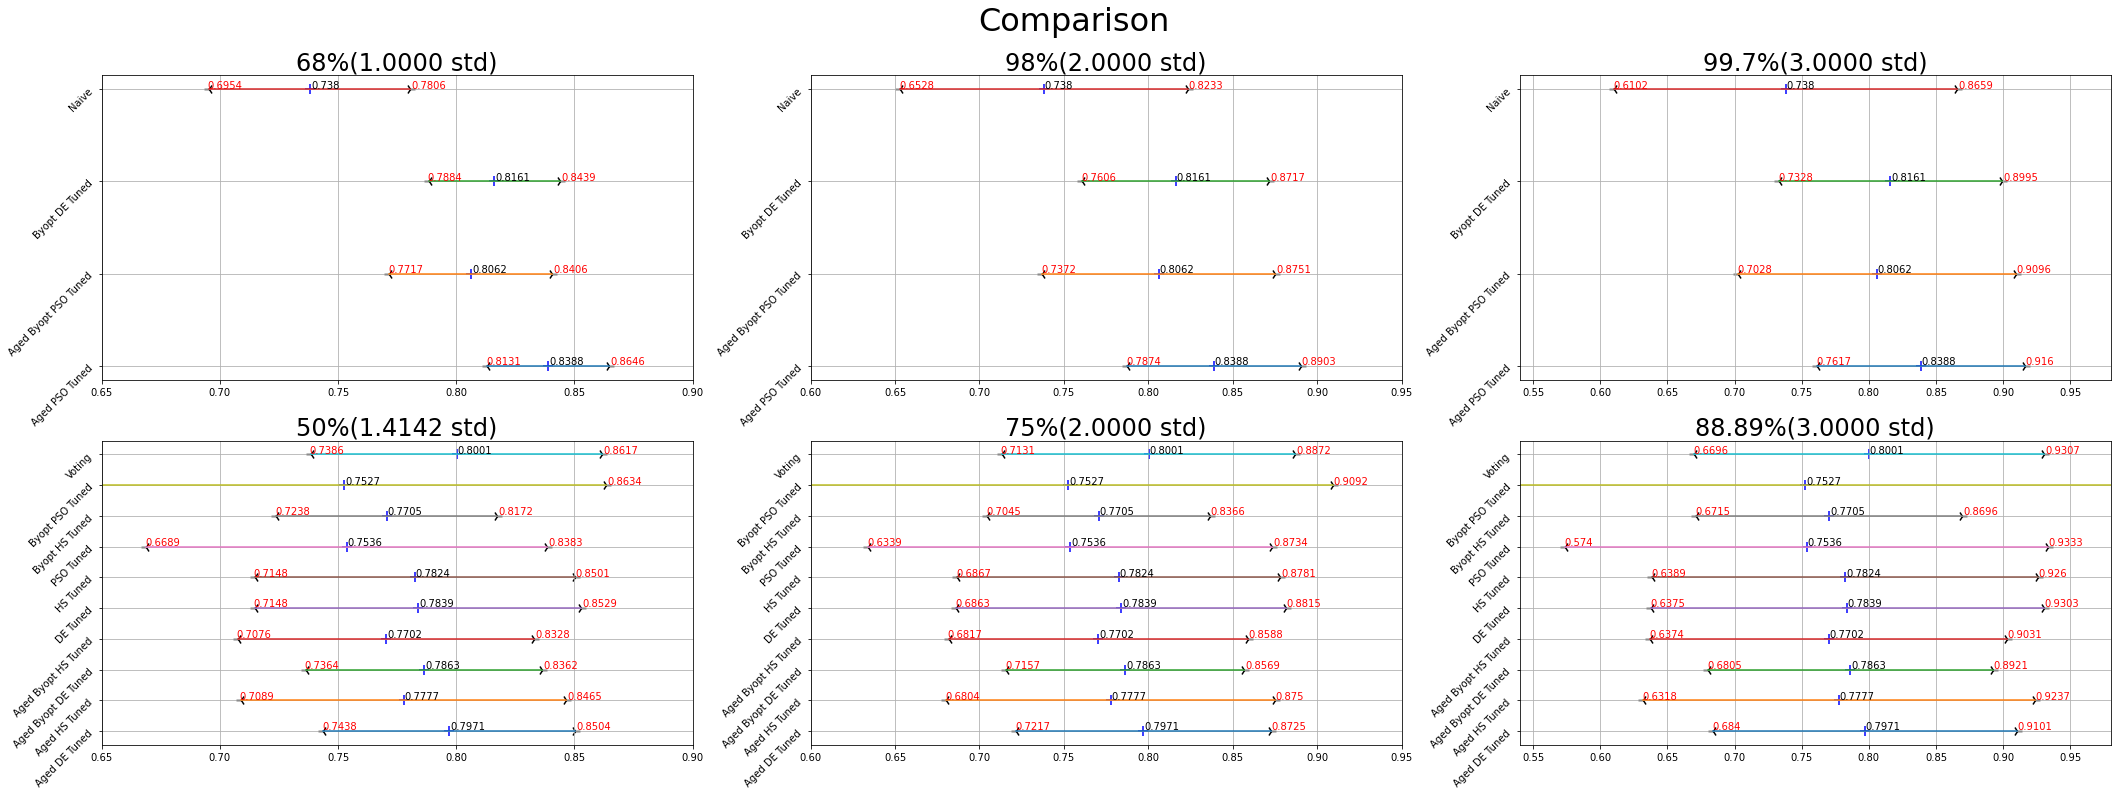

In [121]:
xlim = [
    [0.65, 0.9],
    [0.6, 0.95],
    [0.54, 0.98]
]

plt.figure(figsize=(36, 12))
for _ , p_, idx in zip(k_norm, p_norm, range(len(p_norm))):
    ptr = 0
    plt.subplot(2, 3, idx + 1)
    x = analysis[p_ + f"({_:.4f} std)"]
    mean = analysis["mean_accuracy"]
    for jdx in range(len(df.columns)):
        if x.values[jdx] != "/":
            plt.plot(x.values[jdx], [jdx - ptr, jdx - ptr], label=df.columns[jdx])
            plt.scatter(mean.values[jdx], [jdx - ptr], label=df.columns[jdx], marker="+", s=100, c="blue")
            plt.scatter(x.values[jdx][0], [jdx - ptr], label=df.columns[jdx], marker="3", s=100, c="black")
            plt.scatter(x.values[jdx][1], [jdx - ptr], label=df.columns[jdx], marker="4", s=100, c="black")
            plt.xlim(xlim[idx])
            plt.annotate(round(mean.values[jdx], 4),
                        xy=(mean.values[jdx], jdx - ptr),
                        xytext=(mean.values[jdx] + 0.0005, jdx - ptr + 0.05),
                        ha='left', va='center', color='black')
            plt.annotate(round(x.values[jdx][0], 4),
                        xy=(x.values[jdx][0], jdx - ptr),
                        xytext=(x.values[jdx][0] - 0.0005, jdx - ptr + 0.05),
                        ha='left', va='center', color='red')
            plt.annotate(round(x.values[jdx][1], 4),
                        xy=(x.values[jdx][1], jdx - ptr),
                        xytext=(x.values[jdx][1] + 0.0005, jdx - ptr + 0.05),
                        ha='left', va='center', color='red')
            plt.title(p_ + f"({_:.4f} std)", fontsize=24)
        else:
            ptr += 1
    plt.grid()
    plt.yticks([y for y in range(len(normal_pop))], normal_pop, rotation=45)

k_sub = [np.sqrt(2), 2, 3]
p_sub = ["50%", "75%", "88.89%"]
for _ , p_, idx in zip(k_sub, p_sub, range(3, 6)):
    ptr = 0
    plt.subplot(2, 3, idx + 1)
    x = analysis[p_ + f"({_:.4f} std)"]
    mean = analysis["mean_accuracy"]
    for jdx in range(len(df.columns)):
        if x.values[jdx] != "/":
            plt.plot(x.values[jdx], [jdx - ptr, jdx - ptr], label=df.columns[jdx])
            plt.scatter(mean.values[jdx], [jdx - ptr], label=df.columns[jdx], marker="+", s=100, c="blue")
            plt.scatter(x.values[jdx][0], [jdx - ptr], label=df.columns[jdx], marker="3", s=100, c="black")
            plt.scatter(x.values[jdx][1], [jdx - ptr], label=df.columns[jdx], marker="4", s=100, c="black")
            plt.xlim(xlim[idx - 3])
            plt.annotate(round(mean.values[jdx], 4),
                        xy=(mean.values[jdx], jdx - ptr),
                        xytext=(mean.values[jdx] + 0.0005, jdx - ptr + 0.15),
                        ha='left', va='center', color='black')
            plt.annotate(round(x.values[jdx][0], 4),
                        xy=(x.values[jdx][0], jdx - ptr),
                        xytext=(x.values[jdx][0] - 0.0005, jdx - ptr + 0.15),
                        ha='left', va='center', color='red')
            plt.annotate(round(x.values[jdx][1], 4),
                        xy=(x.values[jdx][1], jdx - ptr),
                        xytext=(x.values[jdx][1] + 0.0005, jdx - ptr + 0.15),
                        ha='left', va='center', color='red')
            plt.title(p_ + f"({_:.4f} std)", fontsize=24)
        else:
            ptr += 1
    plt.grid()
    plt.yticks([y for y in range(len(non_normal_pop))], non_normal_pop, rotation=45)
plt.suptitle("Comparison", fontsize=32)
plt.subplots_adjust(top=0.9)
plt.savefig("result/image/interval_plot/interval comparison.png")

